# **Data Insider**

 **Exploración y Preparación de Datos para el Proyecto "Data Insider"**

\En el marco del proyecto "Data Insider", nos embarcamos en una fascinante travesía para analizar el comportamiento de grandes corporaciones a nivel mundial desde el año 2015. Como científicos de datos para Data Insider, un renombrado equipo de asesores financieros, nos han encomendado la tarea de proporcionar un informe detallado que arroje luz sobre diversos aspectos clave de estas empresas.

Este proyecto abarcando desde la configuración del ambiente hasta la visualizacion de datos en 16 preguntas detonantes, nos sumergiremos en el universo de la manipulación de datos con la ayuda de herramientas esenciales como Pandas, NumPy, Matplotlib y Seaborn.

# 1. **Configuración del Ambiente:**

In [121]:
# Instalamos la biblioteca polygon-api-client para interactuar con la API de Polygon.
!pip install polygon-api-client

* La instalación de polygon-api-client se utiliza en la API de Polygon para obtener datos financieros relacionados con acciones u otros instrumentos financieros.

In [122]:
# Importamos la clase RESTClient de la biblioteca polygon para interactuar con la API de Polygon.
from polygon import RESTClient

* Con la importación de la clase RESTClient, estás preparado para utilizar métodos y funcionalidades proporcionadas por esta clase para realizar solicitudes a la API de Polygon.

In [123]:
!pip show seaborn

Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, pandas
Required-by: lida, missingno


Instalaremos las bibliotecas necesarias, como Pandas, NumPy, Matplotlib y Seaborn, para garantizar una ejecución sin contratiempos de nuestro código.

In [124]:
# Importamos la biblioteca NumPy para operaciones numéricas eficientes.
import numpy as np

# Importamos la biblioteca Pandas para manipulación y análisis de datos estructurados.
import pandas as pd

# Importamos Matplotlib para la creación de gráficos y visualizaciones básicas.
import matplotlib.pyplot as plt

# Importamos Seaborn para mejorar y personalizar las visualizaciones basadas en Matplotlib.
import seaborn as sns

* **NumPy** es una biblioteca esencial para operaciones numéricas eficientes en Python. A menudo se utiliza para realizar cálculos en matrices y arreglos.

* **Pandas** es una biblioteca poderosa para manipulación y análisis de datos. Proporciona estructuras de datos flexibles como DataFrames, que son cruciales para trabajar con conjuntos de datos tabulares.

* **Matplotlib** es una biblioteca estándar para crear gráficos básicos en Python. Se utiliza comúnmente para visualizaciones sencillas.

* **Seaborn** es una biblioteca de visualización basada en Matplotlib que proporciona una interfaz de alto nivel para crear visualizaciones más atractivas y estilizadas

# **2. Obtencion de los datos**

Comenzaremos el proceso de carga de datos utilizando cuatro bancos de datos fundamentales que abarcan diversas dimensiones del análisis financiero global:

1. Forbes Global 2000 (2008-2022):
2. Fortune Global 500:
3. Continentes y Países:
4. Datos Financieros de Empresas (utilizando la API de Polygon):

## **2.1 Forbes Global 2000 (2008-2022):**
* **Origen:** Conjunto de datos proporcionado por aroissues.
* **Descripción:** Este conjunto contiene información financiera clave sobre las principales 2000 empresas a nivel mundial desde 2008 hasta 2022. Los datos están expresados en millones de dólares estadounidenses (USD) y nos brindarán una visión integral de la evolución financiera a lo largo de los años.[Forbes Global 2000 2008-2022 (mil $ unit) - dataset by aroissues](https://data.world/aroissues/forbes-global-2000-2008-2019)

Para este banco de datos, nos centraremos exclusivamente en el periodo comprendido entre los años 2015 y 2022.

In [125]:
# Lista de años desde 2015 hasta 2023
years = list(range(2015, 2023))

# Crear una lista para almacenar todos los DataFrames
forbes_global = []

# Iterar sobre los años y cargar los datos en la lista
for year in years:
    # Construir el nombre del archivo
    file_name = f'Forbes Global 2000 - {year}   unified industry.xlsx'

    try:
        # Cargar datos para el año actual
        data = pd.read_excel(file_name)

        # Almacenar el DataFrame en la lista global
        forbes_global.append(data)

        # Crear una variable específica para cada DataFrame
        globals()[f'data_{year}'] = data

        print(f"Archivo cargado correctamente para el año {year}")

    except Exception as e:
        # En caso de error, imprimir mensaje de error
        print(f"Error al cargar el archivo para el año {year}")
        print(str(e))

# Ahora, 'forbes_global' es una lista que contiene todos los DataFrames
# Además, hay variables específicas para cada DataFrame (por ejemplo, 'data_2010', 'data_2011', etc.)

Archivo cargado correctamente para el año 2015
Archivo cargado correctamente para el año 2016
Archivo cargado correctamente para el año 2017
Archivo cargado correctamente para el año 2018
Archivo cargado correctamente para el año 2019
Archivo cargado correctamente para el año 2020
Archivo cargado correctamente para el año 2021
Archivo cargado correctamente para el año 2022


* La lista years se crea utilizando range para contener los años desde 2015 hasta 2022.
* Se crea una lista vacía llamada forbes_global que se utilizará para almacenar todos los DataFrames.
* El bucle for itera sobre cada año en la lista y construye el nombre del archivo correspondiente.
* Utilizas pd.read_excel para cargar los datos del archivo Excel para cada año.
* Los DataFrames se almacenan en la lista forbes_global y también se crea una variable global específica para cada DataFrame utilizando globals().
* En caso de que haya un error al cargar un archivo, imprime un mensaje de error junto con los detalles del error.
* Al final del bucle, se proporciona un comentario que indica que 'forbes_global' es ahora una lista que contiene todos los DataFrames y que hay variables específicas para cada DataFrame.

Podemos referirnos al primer conjunto de datos del año 2015 de dos maneras:

In [126]:
# Una utilizando la lista global 'forbes_global' con el índice numérico 0
forbes_global[0]

,Rank_nr,Company,Industry,Country,Sales,Profits,Assets,Market_Value
0,1,ICBC,Banking,China,166796.0,44757.2,3322043.0,278327
1,2,China Construction Bank,Banking,China,130473.0,37038.9,2698925.0,212945
2,3,Agricultural Bank of China,Banking,China,129221.0,29124.5,2574815.0,189879
3,4,Bank of China,Banking,China,120297.0,27526.8,2458336.0,199130
4,5,Berkshire Hathaway,Diversified Financials,United States,194673.0,19872.0,534618.0,354813
...,...,...,...,...,...,...,...,...
1995,1996,Yamanashi Chuo Bank,Banking,Japan,450.0,85.3,26356.0,747
1996,1998,TransDigm Group,Aerospace & Defense,United States,2430.0,306.9,6914.0,11582
1997,1998,WEG,Capital Goods,Brazil,3331.0,405.6,4433.0,8458
1998,2000,Hasbro,Consumer Durables,United States,4282.0,415.9,4532.0,7994


In [127]:
# O bien, empleando la variable específica asignada a este conjunto de datos
data_2015

,Rank_nr,Company,Industry,Country,Sales,Profits,Assets,Market_Value
0,1,ICBC,Banking,China,166796.0,44757.2,3322043.0,278327
1,2,China Construction Bank,Banking,China,130473.0,37038.9,2698925.0,212945
2,3,Agricultural Bank of China,Banking,China,129221.0,29124.5,2574815.0,189879
3,4,Bank of China,Banking,China,120297.0,27526.8,2458336.0,199130
4,5,Berkshire Hathaway,Diversified Financials,United States,194673.0,19872.0,534618.0,354813
...,...,...,...,...,...,...,...,...
1995,1996,Yamanashi Chuo Bank,Banking,Japan,450.0,85.3,26356.0,747
1996,1998,TransDigm Group,Aerospace & Defense,United States,2430.0,306.9,6914.0,11582
1997,1998,WEG,Capital Goods,Brazil,3331.0,405.6,4433.0,8458
1998,2000,Hasbro,Consumer Durables,United States,4282.0,415.9,4532.0,7994


Verificamos el contenido de nuestro primer conjunto de datos.

In [128]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank_nr       2000 non-null   int64  
 1   Company       2000 non-null   object 
 2   Industry      2000 non-null   object 
 3   Country       2000 non-null   object 
 4   Sales         1998 non-null   float64
 5   Profits       2000 non-null   float64
 6   Assets        1999 non-null   float64
 7   Market_Value  2000 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 125.1+ KB


* El método .info() del DataFrame data_2015 es para obtener información concisa sobre el conjunto de datos, incluyendo el tipo de datos de cada columna, la cantidad de valores no nulos y el uso de la memoria.

El DataFrame **data_2015** contiene información sobre 2000 empresas, con 8 columnas que representan diferentes atributos. Aquí hay un breve análisis basado en la salida de **data_2015.info()**:

**Columnas:**
1. Rank_nr: Rango numérico de la empresa.
2. Company: Nombre de la empresa.
3. Industry: Industria a la que pertenece la empresa.
4. Country: País de origen de la empresa.
5. Sales: Ventas de la empresa (1998 valores no nulos).
6. Profits: Ganancias de la empresa.
7. Assets: Activos de la empresa (1999 valores no nulos).
8. Market_Value: Valor de mercado de la empresa.
**Tipo de Datos:**
* Tres tipos principales de datos: float64 para valores decimales, int64 para valores enteros y object para datos de tipo cadena (como nombres de empresas, industrias y países).

**Valores No Nulos:**
* Se observa que las columnas Sales y Assets tienen algunos valores nulos, lo que podría requerir atención en la fase de limpieza de datos.

**Memoria Utilizada:**

* El conjunto de datos utiliza aproximadamente 125.1 KB de memoria.

## **2.2 Fortune Global 500:**

* **Origen:** Fuente pública Fortune Global 500 y Proporcionada por **Alura Latam**
* **Descripción:** El conjunto de datos Fortune Global 500 nos ofrece una perspectiva detallada de las 500 principales corporaciones globales. Exploraremos sus clasificaciones, ingresos y otros indicadores clave para comprender mejor el panorama empresarial internacional.

In [129]:
# Lista de años desde 2008 hasta 2022
years = list(range(2015, 2023))

# Crear una lista para almacenar todos los DataFrames HTML
forbes_500 = []

# Iterar sobre los años y cargar los datos HTML en la lista
for year in years:
    # Construir el nombre del archivo HTML
    file_name = f'fortune_global_{year}.html'

    try:
        # Cargar datos HTML para el año actual
        html_data = pd.read_html(file_name)[0]

        # Almacenar el DataFrame HTML en la lista global
        forbes_500.append(html_data)

        # Crear una variable específica para cada DataFrame HTML
        globals()[f'html_data_{year}'] = html_data

        print(f"Archivo HTML cargado correctamente para el año {year}")

    except Exception as e:
        # En caso de error al cargar el archivo HTML
        print(f"Error al cargar el archivo HTML para el año {year}")
        print(str(e))

# Ahora, 'forbes_500' es una lista que contiene todos los DataFrames HTML
# Además, hay variables específicas para cada DataFrame HTML (por ejemplo, 'html_data_2010', 'html_data_2011', etc.)

Archivo HTML cargado correctamente para el año 2015
Archivo HTML cargado correctamente para el año 2016
Archivo HTML cargado correctamente para el año 2017
Archivo HTML cargado correctamente para el año 2018
Archivo HTML cargado correctamente para el año 2019
Archivo HTML cargado correctamente para el año 2020
Archivo HTML cargado correctamente para el año 2021
Archivo HTML cargado correctamente para el año 2022


* Se utiliza pd.read_html para cargar datos desde archivos HTML, que es una forma eficiente de manejar tablas HTML.
* Los DataFrames HTML se almacenan en la lista forbes_500 y también se crea una variable global específica para cada DataFrame.
* En caso de que haya un error al cargar un archivo HTML, imprimes un mensaje de error junto con los detalles del error.
* Al final del bucle, se proporciona un comentario indicando que 'forbes_500' es ahora una lista que contiene todos los DataFrames HTML y que hay variables específicas para cada DataFrame HTML.

Podemos referirnos al segundo conjunto de datos del año 2015 de dos maneras:

In [130]:
# Una utilizando la lista global 'forbes_global' con el índice numérico 0
forbes_500[0]

,RemoveRank,RemoveName,RemoveRevenues,RemoveRevenue Percent Change,RemoveProfits,RemoveAssets,RemoveEmployees
0,1,Walmart,48565100,2.0%,16363,20370600,2200000
1,2,Sinopec Group,44681100,-2.3%,5177,35918220,897488
2,3,Royal Dutch Shell,43134400,-6.1%,14874,35311600,94000
3,4,China National Petroleum,42862000,-0.8%,163595,63481150,1636532
4,5,Exxon Mobil,38259700,-6.1%,32520,34949300,83700
...,...,...,...,...,...,...,...
495,496,Capital One Financial,2387700,-1.2%,4428,30885400,46000
496,497,AntarChile,2384650,-2.1%,5092,2252370,24031
497,498,Rolls-Royce Holdings,2378530,-1.9%,1136,3464920,54100
498,499,Cosmo Oil,2373460,-23.1%,-707,1191420,6359


In [131]:
# O bien, empleando la variable específica asignada a este conjunto de datos
html_data_2015

,RemoveRank,RemoveName,RemoveRevenues,RemoveRevenue Percent Change,RemoveProfits,RemoveAssets,RemoveEmployees
0,1,Walmart,48565100,2.0%,16363,20370600,2200000
1,2,Sinopec Group,44681100,-2.3%,5177,35918220,897488
2,3,Royal Dutch Shell,43134400,-6.1%,14874,35311600,94000
3,4,China National Petroleum,42862000,-0.8%,163595,63481150,1636532
4,5,Exxon Mobil,38259700,-6.1%,32520,34949300,83700
...,...,...,...,...,...,...,...
495,496,Capital One Financial,2387700,-1.2%,4428,30885400,46000
496,497,AntarChile,2384650,-2.1%,5092,2252370,24031
497,498,Rolls-Royce Holdings,2378530,-1.9%,1136,3464920,54100
498,499,Cosmo Oil,2373460,-23.1%,-707,1191420,6359


Verificamos el contenido de nuestro primer conjunto de datos.

In [132]:
html_data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   RemoveRank                    500 non-null    int64 
 1   RemoveName                    500 non-null    object
 2   RemoveRevenues                500 non-null    int64 
 3   RemoveRevenue Percent Change  500 non-null    object
 4   RemoveProfits                 500 non-null    object
 5   RemoveAssets                  500 non-null    int64 
 6   RemoveEmployees               500 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 27.5+ KB


El DataFrame correspondiente al conjunto de datos Fortune Global 500 tiene las siguientes características:

**Número de Filas y Columnas:**

Hay 500 entradas (filas) y 7 columnas en el conjunto de datos.

**Columnas y Tipos de Datos:**

1. RemoveRank (int64): Representa el rango de la empresa en el Fortune Global 500.
2. RemoveName (object): Contiene el nombre de la empresa.
3. RemoveRevenues (int64): Indica los ingresos de la empresa.
4. RemoveRevenue Percent Change (object): Representa el cambio porcentual en los ingresos.
5. RemoveProfits (object): Contiene información sobre las ganancias de la empresa.
6. RemoveAssets (int64): Representa los activos de la empresa.
7. RemoveEmployees (int64): Indica el número de empleados de la empresa.

**Valores No Nulos:**

* No hay valores nulos en ninguna de las columnas, lo que sugiere que el conjunto de datos está completo en términos de valores básicos.

**Tipos de Datos Específicos:**

* Algunas columnas como RemoveRevenue Percent Change y RemoveProfits tienen el tipo de datos 'object', lo que podría indicar que contienen información en formato de cadena.
Uso de Memoria:

El conjunto de datos utiliza aproximadamente 27.5 KB de memoria.

## **2.3 Continentes y Países:**

* **Origen:** Proporcionada por **Alura Latam**.
* **Descripción:** Este conjunto nos permitirá contextualizar los datos empresariales a nivel geográfico. Analizaremos la distribución de las empresas en diferentes continentes y países, lo que puede arrojar luz sobre patrones geoeconómicos y regionales.

In [133]:
# Cargar datos desde el archivo CSV 'continente.csv' en el DataFrame 'continente'
continente = pd.read_csv('continente.csv')

In [134]:
continente

,Continent_Name,Continent_Code,Three_Letter_Country_Code,Country_Name
0,Asia,AS,AFG,"Afghanistan, Islamic Republic of"
1,Europe,EU,ALB,"Albania, Republic of"
2,Antarctica,AN,ATA,Antarctica (the territory South of 60 deg S)
3,Africa,AF,DZA,"Algeria, People's Democratic Republic of"
4,Oceania,OC,ASM,American Samoa
...,...,...,...,...
253,South America,SA,VEN,"Venezuela, Bolivarian Republic of"
254,Oceania,OC,WLF,Wallis and Futuna
255,Oceania,OC,WSM,"Samoa, Independent State of"
256,Asia,AS,YEM,Yemen


In [135]:
continente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Continent_Name             258 non-null    object
 1   Continent_Code             215 non-null    object
 2   Three_Letter_Country_Code  258 non-null    object
 3   Country_Name               258 non-null    object
dtypes: object(4)
memory usage: 8.2+ KB



El DataFrame correspondiente al conjunto de datos de continentes tiene las siguientes características:

**Número de Filas y Columnas:**

Hay 258 entradas (filas) y 4 columnas en el conjunto de datos.

**Columnas y Tipos de Datos:**

1. Continent_Name (object): Representa el nombre del continente.
2. Continent_Code (object): Contiene el código del continente (215 valores no nulos).
3. Three_Letter_Country_Code (object): Contiene el código de tres letras para cada país.
4. Country_Name (object): Indica el nombre del país.

**Valores No Nulos:**

* La columna Continent_Name tiene 258 valores no nulos, mientras que Continent_Code tiene 215 valores no nulos. Las demás columnas no tienen valores nulos.

**Tipos de Datos Específicos:**

* Todas las columnas son de tipo 'object', lo que indica que contienen datos de formato de cadena.

**Uso de Memoria:**

* El conjunto de datos utiliza aproximadamente 8.2 KB de memoria.

In [136]:
# Cargar datos desde el archivo CSV 'country_code.csv' en el DataFrame 'pais_cod'
pais_cod = pd.read_csv('country_code.csv')

* Utilizas la función pd.read_csv para cargar datos desde un archivo CSV llamado 'country_code.csv' en un DataFrame llamado pais_cod.

In [137]:
pais_cod

,Country,Code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND
...,...,...
217,Virgin Islands,VGB
218,West Bank,WBG
219,Yemen,YEM
220,Zambia,ZMB


In [138]:
pais_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  222 non-null    object
 1   Code     222 non-null    object
dtypes: object(2)
memory usage: 3.6+ KB



El DataFrame correspondiente al conjunto de datos de códigos de país tiene las siguientes características:

**Número de Filas y Columnas:**

Hay 222 entradas (filas) y 2 columnas en el conjunto de datos.
Columnas y Tipos de Datos:

1. Country (object): Representa el nombre del país.
2. Code (object): Contiene el código asociado a cada país.

**Valores No Nulos:**

Ambas columnas, Country y Code, tienen 222 valores no nulos, indicando que el conjunto de datos está completo en términos de valores básicos.

**Tipos de Datos Específicos:**

Ambas columnas son de tipo 'object', lo que indica que contienen datos de formato de cadena.

**Uso de Memoria:**

El conjunto de datos utiliza aproximadamente 3.6 KB de memoria.

## **2.4 Datos Financieros de Empresas (utilizando la API de Polygon):**

* **Origen:** API de Polygon (necesitarás una clave de autenticación).
* **Descripción:** Utilizaremos la API de Polygon para obtener datos financieros en tiempo real de cinco empresas específicas. Estos datos incluirán detalles como precios de acciones, volúmenes de negociación y otros indicadores clave que serán fundamentales para nuestro análisis en un tiempo determinado que va de el 1 de enero y el 31 de diciembre de 2022.

In [139]:
# Definir la clave de la API
api_key = 'SnmgKY7BlwapzSWUg37gPZZDQRh2jBGN'

# Crear un cliente REST utilizando la clave de la API
client = RESTClient(api_key)

1. **Oracle**

In [140]:
# Realizar una solicitud a la API para obtener datos históricos de precios para Oracle en 2022
aggs = client.get_aggs(
    "ORCL",
    1,
    "day",
    "2022-01-01",
    "2022-12-31",
)

# Crear un DataFrame con los datos obtenidos
data_oracle = pd.DataFrame(aggs)

# Convertir el campo de tiempo a formato datetime
data_oracle['datetime'] = pd.to_datetime(data_oracle['timestamp'], unit='ms')

# Agregar información adicional al DataFrame
data_oracle['symbol'] = 'ORCL'

# Seleccionar columnas relevantes y guardar los datos en un archivo CSV
data_hist_oracle = data_oracle[['symbol','datetime','open','high','low','close']]
data_hist_oracle.to_csv('/content/sample_data/data_hist_oracle.csv')

In [141]:
data_hist_oracle

,symbol,datetime,open,high,low,close
0,ORCL,2022-01-03 05:00:00,87.33,87.9400,85.7600,87.90
1,ORCL,2022-01-04 05:00:00,87.90,89.5843,87.7300,88.84
2,ORCL,2022-01-05 05:00:00,88.49,88.6000,86.2200,86.46
3,ORCL,2022-01-06 05:00:00,86.00,87.4189,85.5500,86.34
4,ORCL,2022-01-07 05:00:00,86.45,88.0000,86.2801,87.51
...,...,...,...,...,...,...
246,ORCL,2022-12-23 05:00:00,80.51,80.9000,79.9900,80.85
247,ORCL,2022-12-27 05:00:00,80.88,81.4700,80.6050,80.98
248,ORCL,2022-12-28 05:00:00,81.09,81.6399,80.1950,80.33
249,ORCL,2022-12-29 05:00:00,80.97,81.8000,80.7000,81.40


2. **Cisco**

In [142]:
# Realizar una solicitud a la API para obtener datos históricos de precios para Cisco en 2022
aggs = client.get_aggs(
    "CSCO",
    1,
    "day",
    "2022-01-01",
    "2022-12-31",
)

# Crear un DataFrame con los datos obtenidos
data_cisco = pd.DataFrame(aggs)

# Convertir el campo de tiempo a formato datetime
data_cisco['datetime'] = pd.to_datetime(data_cisco['timestamp'], unit='ms')

# Agregar información adicional al DataFrame
data_cisco['symbol'] = 'CSCO'

# Seleccionar columnas relevantes y guardar los datos en un archivo CSV
data_hist_cisco = data_cisco[['symbol','datetime','open','high','low','close']]
data_hist_cisco.to_csv('/content/sample_data/data_hist_cisco.csv')

In [143]:
data_hist_cisco

,symbol,datetime,open,high,low,close
0,CSCO,2022-01-03 05:00:00,62.90,63.35,62.500,63.16
1,CSCO,2022-01-04 05:00:00,62.44,62.81,61.110,61.25
2,CSCO,2022-01-05 05:00:00,61.19,61.64,60.250,60.28
3,CSCO,2022-01-06 05:00:00,60.00,61.13,59.910,60.92
4,CSCO,2022-01-07 05:00:00,60.87,61.50,60.670,61.13
...,...,...,...,...,...,...
246,CSCO,2022-12-23 05:00:00,47.25,47.49,47.010,47.48
247,CSCO,2022-12-27 05:00:00,47.67,47.71,47.215,47.53
248,CSCO,2022-12-28 05:00:00,47.69,47.77,46.980,47.07
249,CSCO,2022-12-29 05:00:00,47.26,47.74,47.260,47.50


3. **Nvidia**

In [144]:
# Realizar una solicitud a la API para obtener datos históricos de precios para Nvidia en 2022
aggs = client.get_aggs(
    "NVDA",
    1,
    "day",
    "2022-01-01",
    "2022-12-31",
)

# Crear un DataFrame con los datos obtenidos
data_nvidia = pd.DataFrame(aggs)

# Convertir el campo de tiempo a formato datetime
data_nvidia['datetime'] = pd.to_datetime(data_nvidia['timestamp'], unit='ms')

# Agregar información adicional al DataFrame
data_nvidia['symbol'] = 'NVDA'

# Seleccionar columnas relevantes y guardar los datos en un archivo CSV
data_hist_nvidia = data_nvidia[['symbol','datetime','open','high','low','close']]
data_hist_nvidia.to_csv('/content/sample_data/data_hist_nvidia.csv')

In [145]:
data_hist_nvidia

,symbol,datetime,open,high,low,close
0,NVDA,2022-01-03 05:00:00,298.15,307.1100,297.85,301.21
1,NVDA,2022-01-04 05:00:00,302.77,304.6800,283.49,292.90
2,NVDA,2022-01-05 05:00:00,289.49,294.1600,275.33,276.04
3,NVDA,2022-01-06 05:00:00,276.40,284.3799,270.65,281.78
4,NVDA,2022-01-07 05:00:00,281.41,284.2200,270.57,272.47
...,...,...,...,...,...,...
246,NVDA,2022-12-23 05:00:00,151.96,153.3900,148.83,152.06
247,NVDA,2022-12-27 05:00:00,150.74,151.0000,140.56,141.21
248,NVDA,2022-12-28 05:00:00,139.27,142.6200,138.84,140.36
249,NVDA,2022-12-29 05:00:00,144.02,146.8300,142.27,146.03


4. **Apple**

In [146]:
# Realizar una solicitud a la API para obtener datos históricos de precios para Apple en 2022
aggs = client.get_aggs(
    "AAPL",
    1,
    "day",
    "2022-01-01",
    "2022-12-31",
)

# Crear un DataFrame con los datos obtenidos
data_apple = pd.DataFrame(aggs)

# Convertir el campo de tiempo a formato datetime
data_apple['datetime'] = pd.to_datetime(data_apple['timestamp'], unit='ms')

# Agregar información adicional al DataFrame
data_apple['symbol'] = 'AAPL'

# Seleccionar columnas relevantes y guardar los datos en un archivo CSV
data_hist_apple = data_apple[['symbol','datetime','open','high','low','close']]
data_hist_apple.to_csv('/content/sample_data/data_hist_apple.csv')

In [147]:
data_hist_apple

,symbol,datetime,open,high,low,close
0,AAPL,2022-01-03 05:00:00,177.83,182.8800,177.71,182.01
1,AAPL,2022-01-04 05:00:00,182.63,182.9400,179.12,179.70
2,AAPL,2022-01-05 05:00:00,179.61,180.1700,174.64,174.92
3,AAPL,2022-01-06 05:00:00,172.70,175.3000,171.64,172.00
4,AAPL,2022-01-07 05:00:00,172.89,174.1400,171.03,172.17
...,...,...,...,...,...,...
246,AAPL,2022-12-23 05:00:00,130.92,132.4150,129.64,131.86
247,AAPL,2022-12-27 05:00:00,131.38,131.4100,128.72,130.03
248,AAPL,2022-12-28 05:00:00,129.67,131.0275,125.87,126.04
249,AAPL,2022-12-29 05:00:00,127.99,130.4814,127.73,129.61


5. **Microsoft**

In [148]:
# Realizar una solicitud a la API para obtener datos históricos de precios para Microsoft en 2022
aggs = client.get_aggs(
    "MSFT",
    1,
    "day",
    "2022-01-01",
    "2022-12-31",
)

# Crear un DataFrame con los datos obtenidos
data_microsoft = pd.DataFrame(aggs)

# Convertir el campo de tiempo a formato datetime
data_microsoft['datetime'] = pd.to_datetime(data_microsoft['timestamp'], unit='ms')

# Agregar información adicional al DataFrame
data_microsoft['symbol'] = 'MSFT'

# Seleccionar columnas relevantes y guardar los datos en un archivo CSV
data_hist_microsoft = data_microsoft[['symbol','datetime','open','high','low','close']]
data_hist_microsoft.to_csv('/content/sample_data/data_hist_microsoft.csv')

In [149]:
data_hist_microsoft

,symbol,datetime,open,high,low,close
0,MSFT,2022-01-03 05:00:00,335.35,338.00,329.7800,334.75
1,MSFT,2022-01-04 05:00:00,334.83,335.20,326.1200,329.01
2,MSFT,2022-01-05 05:00:00,325.86,326.07,315.9800,316.38
3,MSFT,2022-01-06 05:00:00,313.15,318.70,311.4900,313.88
4,MSFT,2022-01-07 05:00:00,314.15,316.50,310.0900,314.04
...,...,...,...,...,...,...
246,MSFT,2022-12-23 05:00:00,236.11,238.87,233.9428,238.73
247,MSFT,2022-12-27 05:00:00,238.70,238.93,235.8300,236.96
248,MSFT,2022-12-28 05:00:00,236.89,239.72,234.1700,234.53
249,MSFT,2022-12-29 05:00:00,235.65,241.92,235.6500,241.01


Resumen de lo realizado hasta ahora:

1. **Oracle (Símbolo: ORCL):**
* Se obtuvieron datos históricos de precios para Oracle durante el año 2022 utilizando la API.
* Los datos se procesaron y se guardaron en un archivo CSV llamado 'data_hist_oracle.csv'.

2. **Cisco (Símbolo: CSCO):**
* Se obtuvieron datos históricos de precios para Cisco durante el año 2022 utilizando la API.
* Los datos se procesaron y se guardaron en un archivo CSV llamado 'data_hist_cisco.csv'.

3. **Nvidia (Símbolo: NVDA):**
* Se obtuvieron datos históricos de precios para Nvidia durante el año 2022 utilizando la API.
* Los datos se procesaron y se guardaron en un archivo CSV llamado 'data_hist_nvidia.csv'.

4. **Apple (Símbolo: AAPL):**
* Se obtuvieron datos históricos de precios para Apple durante el año 2022 utilizando la API.
* Los datos se procesaron y se guardaron en un archivo CSV llamado 'data_hist_apple.csv'.

5. **Microsoft (Símbolo: MSFT):**
* Se obtuvieron datos históricos de precios para Microsoft durante el año 2022 utilizando la API.
* Los datos se procesaron y se guardaron en un archivo CSV llamado 'data_hist_microsoft.csv'.

**Industria de las Empresas:**

1. Oracle (ORCL): Tecnología - Software y Servicios
2. Cisco (CSCO): Tecnología - Equipos y Servicios de Comunicación
3. Nvidia (NVDA): Tecnología - Semiconductores
4. Apple (AAPL): Tecnología - Hardware y Electrónica de Consumo
5. Microsoft (MSFT): Tecnología - Software y Servicios

# **3. Data Wrangling**

El Data Wrangling, también conocido como data munging o data cleaning, es un paso crucial en el proceso de análisis de datos. Aquí hay algunas razones importantes para realizar Data Wrangling:

**1. Datos Incompletos o Erróneos:**

* Los conjuntos de datos pueden contener valores faltantes, duplicados o errores tipográficos. El Data Wrangling permite abordar estos problemas y garantizar la integridad de los datos.

**2. Uniformidad en el Formato:**

* Los datos pueden estar en formatos diferentes o inconsistentes. El Data Wrangling ayuda a estandarizar el formato, lo que facilita su manipulación y análisis.

**3. Manejo de Datos No Estructurados:**

* A menudo, los datos se presentan en formas no estructuradas o no compatibles con las herramientas de análisis. El Data Wrangling transforma los datos para que se ajusten a las necesidades del análisis.

**4. Creación de Nuevas Variables:**

* Puede ser necesario crear nuevas variables derivadas de las existentes para realizar análisis más avanzados. El Data Wrangling permite la creación de estas variables adicionales.

**5. Integración de Múltiples Fuentes de Datos:**

* En proyectos complejos, es común tener datos de múltiples fuentes. El Data Wrangling facilita la integración y combinación de estos conjuntos de datos.

**7. Manejo de Outliers:**

* La identificación y manejo de valores atípicos (outliers) es esencial para evitar que estos afecten negativamente el análisis estadístico y los modelos predictivos.

**8. Optimización del Rendimiento:**

* Al limpiar y preprocesar los datos, se puede mejorar el rendimiento de los algoritmos de análisis. Esto es crucial, especialmente en el aprendizaje automático y otros enfoques analíticos avanzados.

**9. Cumplimiento de Requisitos de Herramientas y Algoritmos:**

* Diferentes herramientas y algoritmos tienen requisitos específicos sobre cómo deben estar estructurados los datos. El Data Wrangling asegura que los datos cumplan con estos requisitos.

**10. Facilita la Visualización:**

* Datos limpios y bien estructurados facilitan la creación de visualizaciones efectivas, lo que es fundamental para comprender patrones y tendencias en los datos.

**11. Preparación para el Análisis:**

* Antes de realizar análisis estadísticos o construir modelos predictivos, es esencial tener datos de alta calidad. El Data Wrangling prepara los datos para su análisis posterior.

## **3.1 Forbes Global 2000**

En esta fase, nos sumergiremos en el exigente proceso de Data Wrangling. Utilizando Pandas, exploraremos a fondo cada uno de nuestros conjuntos de datos del Forbes Global 2000, llevando a cabo las siguientes acciones:

**Renombrar columnas:** Modificaremos los nombres de las columnas para que reflejen con precisión la información que contienen. Las nuevas etiquetas serán las siguientes: Empresa, Industria, País, Ingresos, Ganancias, Activos y Valor de Mercado.

**Exploración detallada:** Analizaremos minuciosamente cada conjunto de datos, examinando su estructura, contenido y cualquier aspecto relevante.

**Creación de variables adicionales:** Para cada conjunto de datos del Forbes 2000, introduciremos variables adicionales que enriquecerán nuestro análisis:

* **Margen de Rentabilidad:** Calculado como Ganancias dividido por Ingresos.
* **Rentabilidad de los Activos (ROA):** Calculado como Ganancias dividido por Activos.
* **Año:** Extraído del nombre de cada conjunto de datos, proporcionando información temporal clave.


**Renombrando columnas**

In [150]:
data_2015

,Rank_nr,Company,Industry,Country,Sales,Profits,Assets,Market_Value
0,1,ICBC,Banking,China,166796.0,44757.2,3322043.0,278327
1,2,China Construction Bank,Banking,China,130473.0,37038.9,2698925.0,212945
2,3,Agricultural Bank of China,Banking,China,129221.0,29124.5,2574815.0,189879
3,4,Bank of China,Banking,China,120297.0,27526.8,2458336.0,199130
4,5,Berkshire Hathaway,Diversified Financials,United States,194673.0,19872.0,534618.0,354813
...,...,...,...,...,...,...,...,...
1995,1996,Yamanashi Chuo Bank,Banking,Japan,450.0,85.3,26356.0,747
1996,1998,TransDigm Group,Aerospace & Defense,United States,2430.0,306.9,6914.0,11582
1997,1998,WEG,Capital Goods,Brazil,3331.0,405.6,4433.0,8458
1998,2000,Hasbro,Consumer Durables,United States,4282.0,415.9,4532.0,7994


In [151]:
# Nombres nuevos para las columnas
nuevos_nombres = ['Nr_Ranking', "Empresa", "Industria", "Pais", 'Ingresos', 'Ganancias', 'Activos', 'Valor de Mercado']

# Lista de todos los conjuntos de datos
dataframes = [data_2015, data_2016, data_2017, data_2018, data_2019, data_2020, data_2021, data_2022]

# Iterar sobre cada conjunto de datos y cambiar los nombres de las columnas
for i, df in enumerate(dataframes):
    df.columns = nuevos_nombres
    print(f"Nuevos nombres aplicados a {i+2015} dataset.")

# Verificar cambios en uno de los conjuntos de datos
data_2015.head()

Nuevos nombres aplicados a 2015 dataset.
Nuevos nombres aplicados a 2016 dataset.
Nuevos nombres aplicados a 2017 dataset.
Nuevos nombres aplicados a 2018 dataset.
Nuevos nombres aplicados a 2019 dataset.
Nuevos nombres aplicados a 2020 dataset.
Nuevos nombres aplicados a 2021 dataset.
Nuevos nombres aplicados a 2022 dataset.


,Nr_Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado
0,1,ICBC,Banking,China,166796.0,44757.2,3322043.0,278327
1,2,China Construction Bank,Banking,China,130473.0,37038.9,2698925.0,212945
2,3,Agricultural Bank of China,Banking,China,129221.0,29124.5,2574815.0,189879
3,4,Bank of China,Banking,China,120297.0,27526.8,2458336.0,199130
4,5,Berkshire Hathaway,Diversified Financials,United States,194673.0,19872.0,534618.0,354813


**Exploración detallada: Nulos**

In [152]:
# Verificar y mostrar la cantidad de valores nulos en cada columna de data_2015
data_2015.isnull().sum()

Nr_Ranking          0
Empresa             0
Industria           0
Pais                0
Ingresos            2
Ganancias           0
Activos             1
Valor de Mercado    0
dtype: int64

In [153]:
# Lista de conjuntos de datos a analizar
dataframes = [data_2015, data_2016, data_2017, data_2018, data_2019, data_2020, data_2021, data_2022]

# Iterar sobre cada conjunto de datos
for i, df in enumerate(dataframes):
    # Filtrar filas que contienen al menos un valor nulo y almacenarlas en una nueva variable
    filas_con_nulos = df[df.isnull().any(axis=1)]

    # Imprimir información sobre las filas con valores nulos
    if not filas_con_nulos.empty:
        print(f"Fila(s) con valores nulos en el conjunto de datos {i + 2015}:")
        print(filas_con_nulos)
        print("--------------------")
    else:
        print(f"No hay filas con valores nulos en el conjunto de datos {i + 2015}.")

Fila(s) con valores nulos en el conjunto de datos 2015:
      Nr_Ranking                    Empresa          Industria     Pais  \
693          695  Porsche Automobil Holding  Consumer Durables  Germany   
1487        1489                      Dexia            Banking  Belgium   
1926        1927  Shanghai Material Trading  Trading Companies    China   

      Ingresos  Ganancias   Activos  Valor de Mercado  
693        NaN     4016.0   36864.0             15287  
1487       NaN     -803.8  299028.0              2352  
1926   12381.0        6.2       NaN               908  
--------------------
Fila(s) con valores nulos en el conjunto de datos 2016:
      Nr_Ranking                       Empresa          Industria  \
670          672     Porsche Automobil Holding  Consumer Durables   
683          685      Gree Electric Appliances  Consumer Durables   
1070        1072        Kyushu Financial Group            Banking   
1396        1398                   RHB Capital            Banking 

**Año 2015:**

* Empresas como Porsche Automobil Holding, Dexia y Shanghai Material Trading tienen valores nulos en "Ingresos" y "Activos".
* Se encontraron valores nulos en "Ingresos" para algunas empresas.

**Año 2016:**

* Porsche Automobil Holding y Gree Electric Appliances presentan valores nulos en "Ingresos" y "Activos".
* Empresas como Kyushu Financial Group y RHB Capital también tienen valores nulos.

**Año 2017:**

* Empresas como Banca MPS y Bank of Greece tienen valores nulos en "Valor de Mercado".
* Grupo Zuliano muestra valores nulos en "Ingresos" y "Activos".
* Technipfmc tiene valores nulos en "Ingresos" y "Activos".

**Año 2018:**

* Empresas como Infineon Technologies y Hainan Airlines tienen valores nulos en "Activos".
* Wanhua Chemical Group y IndusInd Bank también presentan valores nulos en diversas categorías.

**Año 2019:**

* Mahindra & Mahindra y Yes Bank tienen valores nulos en "Activos".
* SM Investments y Finatis también muestran valores nulos en "Ganancias" y "Activos".

**Año 2020:**

* No se encontraron filas con valores nulos.

**Año 2021:**

* Empresas como "fred/companies/F2K/2021/105837" y Bank of Greece tienen valores nulos en "Activos".
* Algunas empresas presentan valores nulos en "Ganancias" y "Valor de Mercado".

**Año 2022:**

* No se encontraron filas con valores nulos, solo valores nulos en "Ingresos", "Ganancias", "Activos" y "Valor de Mercado".

**Los valores nulos los vamos a imputar usando la media, ¿por que?**.

La elección entre utilizar la media o la mediana para llenar valores nulos depende de la distribución de los datos y de la presencia de posibles valores atípicos (**outliers**).

**Sesgo y Outliers:**

* La media es sensible a los valores atípicos (**outliers**). Si los datos tienen una distribución sesgada o contienen valores atípicos, la media puede verse afectada significativamente.
* La mediana es menos sensible a los valores atípicos y proporciona una medida de tendencia central más robusta en presencia de outliers.

**Distribución No Normal:**

* La mediana es una medida de posición central que no asume una distribución normal de los datos. Si tus datos no siguen una distribución normal, la mediana puede ser una mejor representación de la tendencia central.

**Impacto en la Interpretación:**

* Llenar valores nulos con la mediana puede ser preferible cuando la interpretación de la tendencia central es más importante que la representación promedio.

**Preservar la Forma de la Distribución:**

* En algunos casos, llenar valores nulos con la mediana puede ayudar a preservar mejor la forma de la distribución original de los datos, especialmente si hay asimetría.

Es esencial recordar que la elección entre la media y la mediana dependerá de la naturaleza específica de los datos y del objetivo del análisis. En algunos escenarios, la media puede ser más apropiada, especialmente si los datos siguen una distribución normal y no hay valores atípicos importantes.

In [154]:
# Lista de conjuntos de datos a analizar
dataframes = [data_2015, data_2016, data_2017, data_2018, data_2019, data_2020, data_2021, data_2022]

# Iterar sobre cada conjunto de datos
for df in dataframes:
    # Llenar valores nulos en columnas específicas con el valor promedio de esa columna
    df['Ingresos'].fillna(df['Ingresos'].mean(), inplace=True)
    df['Ganancias'].fillna(df['Ganancias'].mean(), inplace=True)
    df['Activos'].fillna(df['Activos'].mean(), inplace=True)
    df['Valor de Mercado'].fillna(df['Valor de Mercado'].mean(), inplace=True)

Confirmemos la implementación de las modificaciones.


In [155]:
# Lista de conjuntos de datos a analizar
dataframes = [data_2015, data_2016, data_2017, data_2018, data_2019, data_2020, data_2021, data_2022]

# Iterar sobre cada conjunto de datos
for i, df in enumerate(dataframes):
    # Filtrar filas que contienen al menos un valor nulo y almacenarlas en una nueva variable
    filas_con_nulos = df[df.isnull().any(axis=1)]

    # Imprimir información sobre las filas con valores nulos
    if not filas_con_nulos.empty:
        print(f"Fila(s) con valores nulos en el conjunto de datos {i + 2015}:")
        print(filas_con_nulos)
        print("--------------------")
    else:
        print(f"No hay filas con valores nulos en el conjunto de datos {i + 2015}.")

No hay filas con valores nulos en el conjunto de datos 2015.
No hay filas con valores nulos en el conjunto de datos 2016.
No hay filas con valores nulos en el conjunto de datos 2017.
No hay filas con valores nulos en el conjunto de datos 2018.
No hay filas con valores nulos en el conjunto de datos 2019.
No hay filas con valores nulos en el conjunto de datos 2020.
No hay filas con valores nulos en el conjunto de datos 2021.
No hay filas con valores nulos en el conjunto de datos 2022.


**Exploración detallada: Duplicados**

In [156]:
# Eliminar filas duplicadas en una lista de DataFrames
dataframes = [data_2015, data_2016, data_2017, data_2018, data_2019, data_2020, data_2021, data_2022]

# Iterar sobre los DataFrames y limpiar duplicados
for i, df in enumerate(dataframes):
    initial_rows = len(df)

    # Eliminar duplicados
    df.drop_duplicates(inplace=True)

    # Imprimir información sobre los duplicados eliminados
    removed_duplicates = initial_rows - len(df)
    print(f"DataFrame {i + 2015}: Se eliminaron {removed_duplicates} duplicados de {initial_rows} filas.")

DataFrame 2015: Se eliminaron 0 duplicados de 2000 filas.
DataFrame 2016: Se eliminaron 0 duplicados de 1999 filas.
DataFrame 2017: Se eliminaron 0 duplicados de 1999 filas.
DataFrame 2018: Se eliminaron 0 duplicados de 2000 filas.
DataFrame 2019: Se eliminaron 0 duplicados de 2000 filas.
DataFrame 2020: Se eliminaron 0 duplicados de 2000 filas.
DataFrame 2021: Se eliminaron 0 duplicados de 2000 filas.
DataFrame 2022: Se eliminaron 0 duplicados de 2000 filas.


**Creación de variables adicionales:**

* Margen de Rentabilidad
* Rentabilidad de los Activos (ROA): Activos.
* Año

In [157]:
# Lista de DataFrames de Forbes
dataframes = [data_2015, data_2016, data_2017, data_2018, data_2019, data_2020, data_2021, data_2022]

# Iterar sobre los DataFrames de Forbes
for i, df in enumerate(dataframes):
    # Crear variables adicionales
    df['Margen de Rentabilidad'] = df['Ganancias'] / df['Ingresos'].round(4)
    df['Rentabilidad de los Activos (ROA)'] = df['Ganancias'] / df['Activos'].round(4)

    # Agregar la variable 'Año' basada en el nombre del DataFrame
    df['Año'] = int(2015 + i)  # Suponiendo que los DataFrames representan años sucesivos

# Imprimir un mensaje de éxito
print("Se agregaron variables con éxito en todos los DataFrames de Forbes.")

Se agregaron variables con éxito en todos los DataFrames de Forbes.


In [158]:
data_2015

,Nr_Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,Rentabilidad de los Activos (ROA),Año
0,1,ICBC,Banking,China,166796.0,44757.2,3322043.0,278327,0.268335,0.013473,2015
1,2,China Construction Bank,Banking,China,130473.0,37038.9,2698925.0,212945,0.283882,0.013724,2015
2,3,Agricultural Bank of China,Banking,China,129221.0,29124.5,2574815.0,189879,0.225385,0.011311,2015
3,4,Bank of China,Banking,China,120297.0,27526.8,2458336.0,199130,0.228824,0.011197,2015
4,5,Berkshire Hathaway,Diversified Financials,United States,194673.0,19872.0,534618.0,354813,0.102079,0.037170,2015
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Yamanashi Chuo Bank,Banking,Japan,450.0,85.3,26356.0,747,0.189556,0.003236,2015
1996,1998,TransDigm Group,Aerospace & Defense,United States,2430.0,306.9,6914.0,11582,0.126296,0.044388,2015
1997,1998,WEG,Capital Goods,Brazil,3331.0,405.6,4433.0,8458,0.121765,0.091496,2015
1998,2000,Hasbro,Consumer Durables,United States,4282.0,415.9,4532.0,7994,0.097128,0.091770,2015


## **3.2 Fortune Global 500**

A los datasets de Fortune Global 500 les vas a cambiar únicamente el nombre de las dos columnas que vas a utilizar (Empresa, Empleados) y añadir una nueva columna para el Año. De esta manera, vas a obtener datasets de Fortune con 3 columnas y 500 filas cada uno.

In [159]:
html_data_2015

,RemoveRank,RemoveName,RemoveRevenues,RemoveRevenue Percent Change,RemoveProfits,RemoveAssets,RemoveEmployees
0,1,Walmart,48565100,2.0%,16363,20370600,2200000
1,2,Sinopec Group,44681100,-2.3%,5177,35918220,897488
2,3,Royal Dutch Shell,43134400,-6.1%,14874,35311600,94000
3,4,China National Petroleum,42862000,-0.8%,163595,63481150,1636532
4,5,Exxon Mobil,38259700,-6.1%,32520,34949300,83700
...,...,...,...,...,...,...,...
495,496,Capital One Financial,2387700,-1.2%,4428,30885400,46000
496,497,AntarChile,2384650,-2.1%,5092,2252370,24031
497,498,Rolls-Royce Holdings,2378530,-1.9%,1136,3464920,54100
498,499,Cosmo Oil,2373460,-23.1%,-707,1191420,6359


In [160]:
# Lista de años
years = range(2015, 2023)

# Función para procesar y modificar un DataFrame
def process_dataframe(df, year):
    # Renombrar las columnas y agregar la columna de año
    df = df.rename(columns={'RemoveName': 'Empresa', 'RemoveEmployees': 'Empleados'})
    df['Año'] = year

    # Seleccionar solo las columnas deseadas
    df = df[['Empresa', 'Empleados', 'Año']]

    return df

# Iterar sobre los años
for year in years:
    # Nombre de la variable del DataFrame actual
    var_name = f'html_data_{year}'

    # Obtener el DataFrame actual por el nombre de la variable
    df = globals()[var_name]

    # Procesar el DataFrame y asignar los cambios a la variable original
    globals()[var_name] = process_dataframe(df, year)

# Imprimir las primeras filas de cada DataFrame modificado
for year in years:
    var_name = f'html_data_{year}'
    print(f"\nPrimeras filas del DataFrame modificado para el año {year}:")
    print(globals()[var_name].head())


Primeras filas del DataFrame modificado para el año 2015:
                    Empresa  Empleados   Año
0                   Walmart    2200000  2015
1             Sinopec Group     897488  2015
2         Royal Dutch Shell      94000  2015
3  China National Petroleum    1636532  2015
4               Exxon Mobil      83700  2015

Primeras filas del DataFrame modificado para el año 2016:
                    Empresa  Empleados   Año
0                   Walmart    2300000  2016
1                State Grid     927839  2016
2  China National Petroleum    1589508  2016
3             Sinopec Group     810538  2016
4         Royal Dutch Shell      90000  2016

Primeras filas del DataFrame modificado para el año 2017:
                    Empresa  Empleados   Año
0                   Walmart    2300000  2017
1                State Grid     926067  2017
2             Sinopec Group     713288  2017
3  China National Petroleum    1512048  2017
4              Toyota Motor     364445  2017

Primeras fil

## **3.3 Continentes y Paises**

A los datasets de country_code y de continente les vas a renombrar sus nombres de columna únicamente. Vas a mantener en ambos datasets las columnas del nombre de pais y codigo (3 letras) y en el de continente, vas a mantener el nombre del continente.

En este paso te sugerimos colocar nombres sencillos a tus columnas como: Pais, Codigo y Continente.

In [161]:
continente

,Continent_Name,Continent_Code,Three_Letter_Country_Code,Country_Name
0,Asia,AS,AFG,"Afghanistan, Islamic Republic of"
1,Europe,EU,ALB,"Albania, Republic of"
2,Antarctica,AN,ATA,Antarctica (the territory South of 60 deg S)
3,Africa,AF,DZA,"Algeria, People's Democratic Republic of"
4,Oceania,OC,ASM,American Samoa
...,...,...,...,...
253,South America,SA,VEN,"Venezuela, Bolivarian Republic of"
254,Oceania,OC,WLF,Wallis and Futuna
255,Oceania,OC,WSM,"Samoa, Independent State of"
256,Asia,AS,YEM,Yemen


In [162]:
# Renombrar las columnas del DataFrame
continente = continente.rename(columns={'Continent_Name': 'Continente',
                                        'Three_Letter_Country_Code': 'Codigo',
                                        'Country_Name': 'Pais'})

# Seleccionar solo las columnas deseadas del DataFrame
continente = continente[['Continente', 'Codigo', 'Pais']]

# Imprimir el DataFrame modificado
continente

,Continente,Codigo,Pais
0,Asia,AFG,"Afghanistan, Islamic Republic of"
1,Europe,ALB,"Albania, Republic of"
2,Antarctica,ATA,Antarctica (the territory South of 60 deg S)
3,Africa,DZA,"Algeria, People's Democratic Republic of"
4,Oceania,ASM,American Samoa
...,...,...,...
253,South America,VEN,"Venezuela, Bolivarian Republic of"
254,Oceania,WLF,Wallis and Futuna
255,Oceania,WSM,"Samoa, Independent State of"
256,Asia,YEM,Yemen


In [163]:
pais_cod

,Country,Code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND
...,...,...
217,Virgin Islands,VGB
218,West Bank,WBG
219,Yemen,YEM
220,Zambia,ZMB


In [164]:
# Renombrar las columnas y seleccionar solo las deseadas
pais_cod = pais_cod.rename(columns={
                                        'Code': 'Codigo',
                                        'Country': 'Pais'})
# Imprimir el DataFrame modificado
pais_cod

,Pais,Codigo
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND
...,...,...
217,Virgin Islands,VGB
218,West Bank,WBG
219,Yemen,YEM
220,Zambia,ZMB


# **4. Juncion de Tablas y Analisis Exploratorio**

## **Parte 1**


1. El DataFrame principal es "Forbes Global 2000 - 2022". Seleccionaremos las columnas relevantes para el análisis.

3. Añadiremos los DataFrames de "Continentes" y "Country Codes" al principal usando la columna "País". Utilizaremos la opción de unión izquierda (how='left') para mantener todas las filas del DataFrame principal.

3. Identificaremos las columnas con valores faltantes y los registros con esos valores. Tomaremos acciones específicas según la naturaleza de los datos faltantes, como corregir errores tipográficos, completar valores o eliminar registros problemáticos.

In [165]:
# Tenemos dos DataFrames: 'pais_cod' y 'continente'

# Fusionar 'pais_cod' con información de 'continente' basándonos en la columna 'Codigo'
# Utilizamos una unión izquierda (how='left') para mantener todas las filas de 'pais_cod'
pais_union = pd.merge(pais_cod, continente[['Codigo','Continente']], on='Codigo', how='left')

# Mostrar el DataFrame resultante que ahora incluye información sobre el continente
pais_union

,Pais,Codigo,Continente
0,Afghanistan,AFG,Asia
1,Albania,ALB,Europe
2,Algeria,DZA,Africa
3,American Samoa,ASM,Oceania
4,Andorra,AND,Europe
...,...,...,...
224,Virgin Islands,VGB,North America
225,West Bank,WBG,NaN
226,Yemen,YEM,Asia
227,Zambia,ZMB,Africa


In [166]:
pais_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Pais    222 non-null    object
 1   Codigo  222 non-null    object
dtypes: object(2)
memory usage: 3.6+ KB


In [167]:
pais_union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 228
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pais        229 non-null    object
 1   Codigo      229 non-null    object
 2   Continente  226 non-null    object
dtypes: object(3)
memory usage: 7.2+ KB


In [168]:
# Se asume que pais_cod y pais_union tienen la misma estructura

# Obtener la cantidad de filas de cada DataFrame
filas_pais_cod = pais_cod.shape[0]
filas_pais_union = pais_union.shape[0]

# Calcular la diferencia en la cantidad de filas
diferencia_filas = abs(filas_pais_cod - filas_pais_union)

# Imprimir la cantidad de filas de diferencia
print(f'La cantidad de filas de diferencia entre pais_cod y pais_union es: {diferencia_filas}')

La cantidad de filas de diferencia entre pais_cod y pais_union es: 7


In [169]:
# Filtrar filas con valores nulos en la columna 'Continente'
filas_sin_continente = pais_union[pais_union['Continente'].isnull()]

# Mostrar el DataFrame resultante con filas sin información sobre el continente
print("Filas sin información sobre el continente:")
filas_sin_continente

Filas sin información sobre el continente:


,Pais,Codigo,Continente
16,"Bahamas, The",BHM,NaN
114,Kosovo,KSV,NaN
225,West Bank,WBG,NaN


In [170]:
# Realizar la búsqueda utilizando el método query y str.contains
busqueda = continente.query("Pais.str.contains('Koso') or Pais.str.contains('Baha')")

# Mostrar el DataFrame resultante con las filas que cumplen la condición de búsqueda
print("Resultado de la búsqueda:")
busqueda

Resultado de la búsqueda:


,Continente,Codigo,Pais
13,North America,BHS,"Bahamas, Commonwealth of the"


In [171]:
# Realizar la búsqueda utilizando el método str.contains
busqueda = pais_union[pais_union['Pais'].str.contains('Baha')]

# Mostrar el DataFrame resultante con las filas que cumplen la condición de búsqueda
print("Resultado de la búsqueda:")
busqueda

Resultado de la búsqueda:


,Pais,Codigo,Continente
16,"Bahamas, The",BHM,NaN


**Bahamas:**

* Se valida que Bahamas debería tener el código de tres dígitos "BHS".
* Si este código no está presente, se puede considerar una discrepancia en los datos.

**Kosovo:**

* No se encontró el país Kosovo en la búsqueda.
* Como resultado, la columna de continente permanecerá nula para Kosovo.

**West Bank:**

* Se menciona que West Bank no es un país, sino un banco.
* En consecuencia, la columna de continente se mantendrá nula para West Bank.

In [172]:
# Asignar manualmente el código 'BHS' al país en la posición 14 del DataFrame pais_union
pais_cod.at[14, 'Codigo'] = 'BHS'

In [173]:
# Realizar nuevamente la unión entre pais_cod y continente utilizando la columna 'Codigo'
# Utilizamos una unión izquierda (how='left') para mantener todas las filas de pais_cod
pais_union = pd.merge(pais_cod, continente[['Codigo', 'Continente']], on='Codigo', how='left')

# Mostrar el DataFrame resultante con la nueva información de continente
pais_union

,Pais,Codigo,Continente
0,Afghanistan,AFG,Asia
1,Albania,ALB,Europe
2,Algeria,DZA,Africa
3,American Samoa,ASM,Oceania
4,Andorra,AND,Europe
...,...,...,...
224,Virgin Islands,VGB,North America
225,West Bank,WBG,NaN
226,Yemen,YEM,Asia
227,Zambia,ZMB,Africa


In [174]:
# Contar la frecuencia de cada país en la columna 'Pais'
conteo = pais_union['Pais'].value_counts()

# Filtrar el DataFrame para incluir solo las filas de países con frecuencia mayor a 1
df_filtrado = pais_union[pais_union['Pais'].isin(conteo[conteo > 1].index)]

# Mostrar el DataFrame resultante con las filas filtradas
df_filtrado

,Pais,Codigo,Continente
9,Armenia,ARM,Europe
10,Armenia,ARM,Asia
14,Azerbaijan,AZE,Europe
15,Azerbaijan,AZE,Asia
55,Cyprus,CYP,Europe
56,Cyprus,CYP,Asia
77,Georgia,GEO,Europe
78,Georgia,GEO,Asia
108,Kazakhstan,KAZ,Europe
109,Kazakhstan,KAZ,Asia


In [175]:
# Especificar las columnas para identificar duplicados
columnas_duplicadas = ['Pais', 'Codigo']

# Eliminar filas duplicadas en el DataFrame pais_union basándose en las columnas especificadas
pais_union = pais_union.drop_duplicates(subset=columnas_duplicadas)

In [176]:
# Se valida que tiene la misma cantidad de filas que la data original (continente)
pais_union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 228
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pais        222 non-null    object
 1   Codigo      222 non-null    object
 2   Continente  220 non-null    object
dtypes: object(3)
memory usage: 6.9+ KB


**Juncion entre forbes 2000-2022 y Data_Country**

In [177]:
data_2022_union = pd.merge(data_2022, pais_union[['Pais','Codigo','Continente']], on='Pais', how = 'left')

In [178]:
# Verificamos si hay nulos
data_2022_union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Nr_Ranking                         2000 non-null   object 
 1   Empresa                            2000 non-null   object 
 2   Industria                          2000 non-null   object 
 3   Pais                               2000 non-null   object 
 4   Ingresos                           2000 non-null   int64  
 5   Ganancias                          2000 non-null   float64
 6   Activos                            2000 non-null   int64  
 7   Valor de Mercado                   2000 non-null   int64  
 8   Margen de Rentabilidad             2000 non-null   float64
 9   Rentabilidad de los Activos (ROA)  2000 non-null   float64
 10  Año                                2000 non-null   int64  
 11  Codigo                             1934 non-null   objec

Hay valores nulos en nuestras columnas codigo y continente

In [179]:
# Identificar filas con valores nulos en la columna 'Codigo' en el conjunto de datos 'data_2022_union'
data_2022_nulos = data_2022_union[data_2022_union['Codigo'].isnull()]

# Mostrar la lista única de países presentes en las filas seleccionadas con valores nulos en 'Codigo'
data_2022_nulos['Pais'].unique()

array(['South Korea', 21274], dtype=object)

* Se valida que el pais South Korea no esta haciendo match con el pais de la data country
* Se valida que hay un pais 21274, en este caso no es un pais

In [180]:
#Modificamos el nombre a South Korea
# Obtenemos como se encuentra en nombre de South Korea en la data_country
pais_union.query("Pais.str.contains('Korea')")

,Pais,Codigo,Continente
112,"Korea, North",PRK,Asia
113,"Korea, South",KOR,Asia


In [181]:
# Modificamos en Data_Country_cont la fila 113 con el nuevo valor del pais Korea,South -> South Korea
pais_union.at[113, 'Pais'] = 'South Korea'

In [182]:
# Eliminar filas con el código de país '21274'
data_2022_union = data_2022_union[data_2022_union['Codigo'] != 21274]

In [183]:
# Con la informacion actualizada, nuevamente realizamos la juncion de la data de forbes 2022 y la data country_cont
data_2022_union = pd.merge(data_2022, pais_union[['Pais','Codigo','Continente']], on='Pais', how = 'left')

In [184]:
data_2022_union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Nr_Ranking                         2000 non-null   object 
 1   Empresa                            2000 non-null   object 
 2   Industria                          2000 non-null   object 
 3   Pais                               2000 non-null   object 
 4   Ingresos                           2000 non-null   int64  
 5   Ganancias                          2000 non-null   float64
 6   Activos                            2000 non-null   int64  
 7   Valor de Mercado                   2000 non-null   int64  
 8   Margen de Rentabilidad             2000 non-null   float64
 9   Rentabilidad de los Activos (ROA)  2000 non-null   float64
 10  Año                                2000 non-null   int64  
 11  Codigo                             1999 non-null   objec

## **Parte 2**
1. Vas a concatenar todos los datasets de Forbes 2000 desde el año 2015 hasta el año 2022.

2. Tu nuevo dataframe debe contener 16000 filas x 13 columnas: 'Rank_nr', 'Empresa', 'Industria', 'Pais', 'Ingresos', 'Ganancias', 'Activos', 'Valor_Mercado', 'Ano', 'Margen_Rentabilidad', 'ROA', 'Continente', 'Codigo'

In [185]:
# Validamos si todos los datasets tienen 2000 filas
dataframes = [data_2015, data_2016, data_2017, data_2018, data_2019, data_2020, data_2021, data_2022]

for year, df in zip(range(2015, 2023), dataframes):
    num_rows = df.shape[0]
    print(f"Año {year}: {num_rows} filas")

Año 2015: 2000 filas
Año 2016: 1999 filas
Año 2017: 1999 filas
Año 2018: 2000 filas
Año 2019: 2000 filas
Año 2020: 2000 filas
Año 2021: 2000 filas
Año 2022: 2000 filas


In [186]:
# Modificamos la columna 'Nr_Ranking' en todos los datasets
dataframes = [data_2015, data_2016, data_2017, data_2018, data_2019, data_2020, data_2021, data_2022]

for i, df in enumerate(dataframes):
    # Creamos una lista de rango actualizado (comenzando desde 1)
    rango_actualizado = [j + 1 for j in range(len(df))]

    # Actualizamos la columna 'Nr_Ranking'
    df['Nr_Ranking'] = rango_actualizado

    # Guardamos el dataframe actualizado en la lista de dataframes
    dataframes[i] = df

In [187]:
# Concatenamos los dataframes verticalmente
data_forbes = pd.concat([data_2015, data_2016, data_2017, data_2018, data_2019, data_2020, data_2021, data_2022])

In [188]:
# Realizamos un left join entre data_forbes y pais_union usando la columna 'Pais'
data_forbes_total = pd.merge(data_forbes, pais_union[['Pais','Codigo','Continente']], on='Pais', how='left')

In [189]:
# Verificamos los nulos.
data_forbes_total[data_forbes_total['Codigo'].isnull()]

,Nr_Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Margen de Rentabilidad,Rentabilidad de los Activos (ROA),Año,Codigo,Continente
13467,1470,fred/companies/F2K/2021/105837,IT Software & Services,5855,68126.0,1793.0,111811.145646,235.0,0.026319,0.016036,2021,NaN,NaN
14733,736,fred/companies/F2K/2022/105837,IT Software & Services,21274,28636.0,370.0,1468.000000,632.0,0.012921,0.252044,2022,NaN,NaN


##**Parte 3**
1. Vas a hacer la junción de todos los datasets de Forbes 2000 desde el año 2015 hasta el año 2022 con los datasets de Fortune Global 500 que contienen únicamente 4000 filas y 3 columna: 'Ano', 'Empresa', 'Empleados' . Observación: La junción con los datos de Forbes debe ser utilizando dos columnas como clave que serían 'Ano', 'Empresa', respectivamente.

2. Como los rankings de Forbes y de Fortune son diferentes, vas a tener más del 80% de datos referentes a empleados faltantes. En este caso, únicamente vamos a trabajar con los datos que tienen correspondencia en ambas bases de datos. Se trata de alrededor 2200 registros de Forbes que tienen correspondencia con registros de Fortune que permiten tener la información sobre el número de empleados.

In [190]:
# Validamos si todos los dataset tienen cantidad de 500 filas
dataframes_forbes = [html_data_2015,html_data_2016,html_data_2017,html_data_2018,html_data_2019,html_data_2020,html_data_2021,html_data_2022]

for i, df in enumerate(dataframes_forbes):
    filas = df.shape[0]
    anhos = i + 2015
    print(anhos, filas)

2015 500
2016 500
2017 500
2018 501
2019 500
2020 500
2021 500
2022 500


In [191]:
html_data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Empresa    501 non-null    object
 1   Empleados  501 non-null    int64 
 2   Año        501 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 11.9+ KB


In [192]:
# Paso 1: Contar la frecuencia de cada empresa en el conjunto de datos del 2018
conteo_empresa = html_data_2018['Empresa'].value_counts()

# Paso 2: Filtrar las filas con empresas duplicadas
# Seleccionar solo las filas donde la empresa tiene más de una ocurrencia en el conjunto de datos
df_filtrado = html_data_2018[html_data_2018['Empresa'].isin(conteo_empresa[conteo_empresa > 1].index)]

# Mostrar el DataFrame resultante que contiene las filas duplicadas
df_filtrado

,Empresa,Empleados,Año
235,KDDI,38826,2018
236,KDDI,38826,2018


In [193]:
# Eliminamos los duplicados
html_data_2018 = html_data_2018.drop_duplicates()

In [194]:
# Confirmamos
dataframes_forbes = [html_data_2015,html_data_2016,html_data_2017,html_data_2018,html_data_2019,html_data_2020,html_data_2021,html_data_2022]

for i, df in enumerate(dataframes_forbes):
    filas = df.shape[0]
    anhos = i + 2015
    print(anhos, filas)

2015 500
2016 500
2017 500
2018 500
2019 500
2020 500
2021 500
2022 500


In [195]:
# Concatenar todos los conjuntos de datos HTML desde 2015 hasta 2022
html_data_total = pd.concat([html_data_2015, html_data_2016, html_data_2017, html_data_2018, html_data_2019, html_data_2020, html_data_2021, html_data_2022])

# Imprimir la cantidad total de filas en el conjunto de datos resultante
print("Cantidad total de filas en html_data_total:", html_data_total.shape[0])

Cantidad total de filas en html_data_total: 4000


In [196]:
# Combinar los conjuntos de datos data_forbes_total y html_data_total
data_total = pd.merge(data_forbes_total, html_data_total[['Año', 'Empresa', 'Empleados']], on=['Año', 'Empresa'], how='left')

In [197]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15998 entries, 0 to 15997
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Nr_Ranking                         15998 non-null  int64  
 1   Empresa                            15998 non-null  object 
 2   Industria                          15998 non-null  object 
 3   Pais                               15998 non-null  object 
 4   Ingresos                           15998 non-null  float64
 5   Ganancias                          15998 non-null  float64
 6   Activos                            15998 non-null  float64
 7   Valor de Mercado                   15998 non-null  float64
 8   Margen de Rentabilidad             15998 non-null  float64
 9   Rentabilidad de los Activos (ROA)  15998 non-null  float64
 10  Año                                15998 non-null  int64  
 11  Codigo                             15996 non-null  obj

# **5. Consulta de los datos**

## **Cuestionario A**

Las siguientes preguntas se refieren al ranking Forbes 2000 del año **2022**:

**1. ¿Cuál es el Top 10 de países con más empresas en Forbes para el periodo indicado?**

In [198]:
# Filtrar el DataFrame para el año 2022
data_forbes_2022 = data_2022_union[data_2022_union['Año'] == 2022]

# Obtener el Top 10 de países con más empresas
top_10_paises = data_forbes_2022['Pais'].value_counts().head(10)

# Crear un DataFrame con la información
top_10_paises_ca = pd.DataFrame({'Pais': top_10_paises.index, 'Numero de Empresas': top_10_paises.values})

# Mostrar el DataFrame
top_10_paises_ca

,Pais,Numero de Empresas
0,United States,584
1,China,297
2,Japan,196
3,South Korea,65
4,United Kingdom,64
5,Canada,64
6,India,55
7,France,54
8,Hong Kong,54
9,Germany,52


**2. ¿Cuál es el Top 4 de países con más empresas en el área de tecnología y de telecomunicaciones?**

In [199]:
# Filtrar el DataFrame para incluir solo empresas de tecnología y telecomunicaciones
tecnologia_telecom = data_2022_union[data_2022_union['Industria'].isin(['Technology Hardware & Equipment', 'Semiconductors', 'Software & Services', 'Telecommunications'])]

# Obtener el Top 4 de países con más empresas en tecnología y telecomunicaciones
top_4_paises_tecnologia = tecnologia_telecom['Pais'].value_counts().head(4)

# Crear un DataFrame con la información
df_top_4_paises_tecnologia_ca = pd.DataFrame({'Pais': top_4_paises_tecnologia.index, 'Numero de Empresas': top_4_paises_tecnologia.values})

# Mostrar el DataFrame
df_top_4_paises_tecnologia_ca

,Pais,Numero de Empresas
0,United States,34
1,Taiwan,15
2,China,13
3,Japan,11


**3. ¿Cuál fue el margen de pérdida de las 5 empresas que presentaron mayores perjuicios considerando el total de pérdidas registradas en la Industria de los Hoteles, Restaurantes y entretenimiento?**

In [200]:
# Filtrar el DataFrame para la industria de Hoteles, Restaurantes y Entretenimiento
industria_hoteles = data_2022_union[data_2022_union['Industria'] == 'Hotels, Restaurants & Leisure']

# Ordenar las empresas por pérdidas en orden descendente y tomar las primeras 5
top_5_perdidas = industria_hoteles.sort_values(by='Ganancias', ascending=True).head(5)

# Calcular el margen de pérdida (Ganancias/Ingresos)
top_5_perdidas['Margen de Perdida'] = top_5_perdidas['Ganancias'] / top_5_perdidas['Ingresos']

# Calcular el porcentaje de pérdida tomando el 100% como la suma de las pérdidas de las 5 empresas
total_perdidas = top_5_perdidas['Ganancias'].sum()
top_5_perdidas['Porcentaje de Perdida'] = ((top_5_perdidas['Ganancias'] / total_perdidas) * 100).round(2)

# Seleccionar las columnas relevantes
top_5_perdidas_ca = top_5_perdidas[['Empresa', 'Ganancias', 'Ingresos', 'Margen de Perdida', 'Porcentaje de Perdida']]

# Mostrar los resultados
top_5_perdidas_ca

,Empresa,Ganancias,Ingresos,Margen de Perdida,Porcentaje de Perdida
1219,Carnival Corporation,-9419.0,3506,-2.686537,54.66
1376,Royal Caribbean Group,-5260.5,1532,-3.433747,30.53
1171,Caesars Entertainment,-1019.0,9477,-0.107523,5.91
1528,Las Vegas Sands,-961.0,4234,-0.226972,5.58
1315,Flutter Entertainment,-571.9,8302,-0.068887,3.32


**4. Considerando a la Industria Petrolera en Asia, ¿Cuál o cuáles empresas superaron en más del 20% su margen de rentabilidad?**

In [201]:
# Filtrar las empresas de la industria petrolera en Asia
petroleras_asia = data_2022_union[(data_2022_union['Industria'] == 'Oil & Gas Operations') & (data_2022_union['Continente'] == 'Asia')].copy()

# Calcular el margen de rentabilidad en porcentaje
petroleras_asia['Margen de Rentabilidad PTC'] = (petroleras_asia['Margen de Rentabilidad'] * 100).round(2)

# Filtrar las empresas que superaron en más del 20% su margen de rentabilidad
empresas_destacadas = petroleras_asia[petroleras_asia['Margen de Rentabilidad PTC'] > 20]

# Ordenar el DataFrame por el margen de rentabilidad en porcentaje de forma ascendente
empresas_destacadas_ca = empresas_destacadas.sort_values(by='Margen de Rentabilidad PTC', ascending=False)

# Mostrar los resultados
empresas_destacadas_ca[['Empresa', 'Industria', 'Margen de Rentabilidad PTC']]

,Empresa,Industria,Margen de Rentabilidad PTC
133,CNOOC,Oil & Gas Operations,28.87
1955,ADNOC Drilling,Oil & Gas Operations,26.62
2,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,26.32
1745,Adani Total Gas,Oil & Gas Operations,21.93


**5. ¿Cuáles fueron las empresas norteamericanas con el mayor porcentaje de rentabilidad por industria?**

In [202]:
# Filtrar las empresas norteamericanas con un margen de rentabilidad menor a 1 (menor al 100%)
empresas_norteamericanas = data_2022_union[(data_2022_union['Continente'] == 'North America') & (data_2022_union['Margen de Rentabilidad'] < 1)]

# Obtener el índice de las empresas con el mayor margen de rentabilidad en cada industria
mayor_rentabilidad = empresas_norteamericanas.groupby('Industria')['Margen de Rentabilidad'].idxmax()

# Seleccionar las columnas relevantes para mostrar los resultados
empresas_rentabilidad = empresas_norteamericanas.loc[mayor_rentabilidad, ['Industria', 'Empresa', 'Margen de Rentabilidad']]

# Calcular el porcentaje de rentabilidad multiplicando por 100
empresas_rentabilidad['% Rentabilidad'] = (empresas_rentabilidad['Margen de Rentabilidad'] * 100).round(2)

# Ordenar las empresas de forma descendente por el porcentaje de rentabilidad
empresas_rentabilidad_ca = empresas_rentabilidad.sort_values(by='% Rentabilidad', ascending=False)

# Mostrar los resultados
empresas_rentabilidad_ca

,Industria,Empresa,Margen de Rentabilidad,% Rentabilidad
683,Business Services & Supplies,Thomson Reuters,0.900142,90.01
1107,Oil & Gas Operations,Chesapeake Energy,0.864835,86.48
1288,Telecommunications Services,Frontier Communications Parent,0.772890,77.29
524,Diversified Financials,Prologis,0.770849,77.08
1869,Insurance,E-L Financial,0.700915,70.09
373,Drugs & Biotechnology,Moderna,0.663080,66.31
921,IT Software & Services,Shopify,0.631982,63.20
1545,Materials,Wheaton Precious Metals,0.628893,62.89
1134,Banking,East West Bancorp,0.474384,47.44
349,Semiconductors,Texas Instruments,0.421718,42.17


**6. Excluyendo a la industria Bancaria, ¿Cuáles fueron las empresas europeas con  mayores pérdidas registradas por industria a nivel global?**

In [203]:
# Filtrar las empresas europeas con pérdidas en la industria excepto en Banking
empresas_europeas = data_2022_union[
    (data_2022_union['Continente'] == 'Europe') &
    (data_2022_union['Industria'] != 'Banking') &
    (data_2022_union['Ganancias'] < 0)
]

# Obtener el índice de las empresas con las mayores pérdidas en cada industria
mayores_perdidas = empresas_europeas.groupby('Industria')['Ganancias'].idxmax()

# Seleccionar las columnas relevantes para mostrar los resultados y ordenar por pérdidas
empresas_perdidas_ca = empresas_europeas.loc[mayores_perdidas, ['Industria', 'Empresa', 'Ganancias']].sort_values('Ganancias')

empresas_perdidas_ca

,Industria,Empresa,Ganancias
819,Insurance,Phoenix Group Holdings,-1182.8
1502,Construction,Unibail-Rodamco,-1149.0
1116,Trading Companies,Finatis,-582.7
1315,"Hotels, Restaurants & Leisure",Flutter Entertainment,-571.9
798,Capital Goods,Siemens Energy,-541.3
1847,Business Services & Supplies,Amadeus IT Group,-148.3
1637,Transportation,Aena,-71.0
724,Consumer Durables,Reckitt Benckiser Group,-44.0
1393,IT Software & Services,Spotify Technology,-38.6
1837,Telecommunications Services,Sistema,-9.8


**7. ¿Cuál fue la distribución de Ingresos y Activos con respecto a las ganancias de los bancos cuyos activos no superan los 30000 millones de dólares?**

In [204]:
# Filtrar los datos
data_filtrada = data_2022_union[(data_2022_union['Industria'] == 'Banking') & (data_2022_union['Activos'] <= 30000)]

# Seleccionar las columnas relevantes
distribucion_data_ca = data_filtrada[['Empresa','Ingresos', 'Activos', 'Ganancias']]

# Mostrar el DataFrame con la distribución
distribucion_data_ca

,Empresa,Ingresos,Activos,Ganancias
1276,Grupo Inbursa,3451,27900,1029.7
1523,Halyk Bank,2933,27809,1083.6
1875,Vietnam Technological & Commercial Joint Stock...,2073,24955,787.1


In [205]:
# Datos de las tres empresas
datos_empresas = {
    'Empresa': ['Grupo Inbursa', 'Halyk Bank', '1Vietnam Technological & Commercial Joint Stock Bank'],
    'Ingresos': [3451, 2933, 2073],
    'Activos': [27900, 27809, 24955],
    'Ganancias': [1029.7, 1083.6, 787.1]
}

# Crear un DataFrame
df_empresas = pd.DataFrame(datos_empresas)

# Mostrar un resumen estadístico
resumen_estadistico = df_empresas.describe()

# Mostrar el resumen estadístico
resumen_estadistico

,Ingresos,Activos,Ganancias
count,3.000000,3.000000,3.000000
mean,2819.000000,26888.000000,966.800000
std,696.037355,1674.645336,157.941033
min,2073.000000,24955.000000,787.100000
25%,2503.000000,26382.000000,908.400000
50%,2933.000000,27809.000000,1029.700000
75%,3192.000000,27854.500000,1056.650000
max,3451.000000,27900.000000,1083.600000


**Ingresos:**

* Media: 2819 millones
* Desviación estándar: 696.04 millones
* Mínimo: 2073 millones
* Máximo: 3451 millones

**Activos:**

* Media: 26888 millones
* Desviación estándar: 1674.65 millones
* Mínimo: 24955 millones
* Máximo: 27900 millones

**Ganancias:**

* Media: 966.8 millones
* Desviación estándar: 157.94 millones
* Mínimo: 787.1 millones
* Máximo: 1083.6 millones

**8. Considerando el histórico de valores de las acciones en el año 2022 de las 5 empresas de tu elección (Paso 2), Indica ¿Cuál fue la mejor semana para comprar y cuál para vender respectivamente? (Se compra cuando el precio es bajo, y se vende cuando el precio es alto)**

In [206]:
# Lista de símbolos de las empresas
empresas = ['apple','oracle', 'microsoft', 'nvidia', 'cisco']

# Crear un bucle para iterar sobre las empresas
for empresa in empresas:
    # Crear el nombre del DataFrame dinámicamente
    nombre_df = f'data_hist_{empresa}'

    # Crear una copia del DataFrame para evitar SettingWithCopyWarning
    df_copy = globals()[nombre_df].copy()

    # Actualizar el código para evitar FutureWarning
    data_semanal = df_copy.groupby(df_copy['datetime'].dt.isocalendar().week)['close'].agg(['min', 'max'])
    data_semanal['fechas'] = df_copy.groupby(df_copy['datetime'].dt.isocalendar().week)['datetime'].agg(lambda x: f"{x.min().date()} - {x.max().date()}")

    # Encontrar la semana con el precio mínimo y máximo
    semana_compra = data_semanal['min'].idxmin()
    semana_venta = data_semanal['max'].idxmax()

    # Convertir el número de semana a un objeto datetime
    start_of_week = df_copy.loc[df_copy['datetime'].dt.isocalendar().week == semana_compra, 'datetime'].min()
    end_of_week = df_copy.loc[df_copy['datetime'].dt.isocalendar().week == semana_compra, 'datetime'].max()

    # Imprimir las fechas y valores para cada empresa
    print(f"Mejor semana para comprar ({empresa}): {start_of_week.strftime('%d-%m-%Y')}, Valor de la acción: {data_semanal.loc[semana_compra, 'min']}")
    print(f"Mejor semana para vender ({empresa}): {end_of_week.strftime('%d-%m-%Y')}, Valor de la acción: {data_semanal.loc[semana_venta, 'max']}")
    print("\n")

Mejor semana para comprar (apple): 27-12-2022, Valor de la acción: 126.04
Mejor semana para vender (apple): 30-12-2022, Valor de la acción: 182.01


Mejor semana para comprar (oracle): 26-09-2022, Valor de la acción: 61.07
Mejor semana para vender (oracle): 30-09-2022, Valor de la acción: 89.28


Mejor semana para comprar (microsoft): 31-10-2022, Valor de la acción: 214.25
Mejor semana para vender (microsoft): 04-11-2022, Valor de la acción: 334.75


Mejor semana para comprar (nvidia): 10-10-2022, Valor de la acción: 112.27
Mejor semana para vender (nvidia): 14-10-2022, Valor de la acción: 301.21


Mejor semana para comprar (cisco): 10-10-2022, Valor de la acción: 39.27
Mejor semana para vender (cisco): 14-10-2022, Valor de la acción: 63.16




## **Cuestionario B**

Las siguientes preguntas se refieren al ranking Forbes 2000 considerando el **periodo 2015 - 2022**:

**1. ¿Cuál es el Top 10 de países con más empresas en Forbes para el periodo indicado?**

In [207]:
# Obtener el Top 10 de países con más empresas
top_10_paises = data_forbes_total['Pais'].value_counts().head(10)

# Crear un DataFrame con los resultados
df_top_10_paises_cb = pd.DataFrame({'Pais': top_10_paises.index, 'Cantidad de Empresas': top_10_paises.values})

# Mostrar el DataFrame
df_top_10_paises_cb

,Pais,Cantidad de Empresas
0,United States,4616
1,China,1918
2,Japan,1745
3,United Kingdom,658
4,South Korea,511
5,France,460
6,Canada,451
7,Hong Kong,449
8,India,440
9,Germany,418


**2. ¿Cuál es el Top 5 de países con más empresas en el área de tecnología y de telecomunicaciones?**

In [208]:
# Filtrar las empresas en el área de tecnología y telecomunicaciones
empresas_tecnologia = data_forbes_total[data_forbes_total['Industria'].isin(['Telecommunications Services', 'Technology Hardware & Equipment'])]

# Obtener el Top 5 de países con más empresas en esa área
top_5_paises_tecnologia = empresas_tecnologia['Pais'].value_counts().head(5)

# Crear un DataFrame con los resultados
df_top_5_paises_tecnologia_cb = pd.DataFrame({'Pais': top_5_paises_tecnologia.index, 'Cantidad de Empresas': top_5_paises_tecnologia.values})

# Mostrar el DataFrame
df_top_5_paises_tecnologia_cb

,Pais,Cantidad de Empresas
0,United States,135
1,China,79
2,Taiwan,69
3,Japan,56
4,South Korea,24


**3. ¿Cuál fue el margen de pérdida de las 10 empresas que presentaron mayores perjuicios considerando el total de pérdidas registradas en la Industria de los Hoteles, Restaurantes y entretenimiento?**

In [209]:
# Actualizar el nombre de la empresa
data_total['Empresa'] = data_total['Empresa'].replace('Carnival', 'Carnival Corporation')

# Filtrar las empresas en la industria de Hoteles, Restaurantes y Ocio con pérdidas y margen de rentabilidad menor al 100%
data_hotel = data_total[(data_total['Industria'] == 'Hotels, Restaurants & Leisure') & (data_total['Ganancias'] < 0)].sort_values('Ganancias')

# Calcular el margen de rentabilidad absoluto en porcentaje y filtrar aquellos menores al 100%
data_hotel['Margen de Rentabilidad ABS'] = (data_hotel['Margen de Rentabilidad'] * 100).abs()
data_hotel = data_hotel[data_hotel['Margen de Rentabilidad ABS'] < 100]

# Obtener las empresas con mayor rentabilidad acumulada (sumando los márgenes de rentabilidad absoluto)
top_10_empresas_perdidas_cb = (data_hotel.groupby('Empresa')['Margen de Rentabilidad ABS'].sum().head(10)).round(2)

top_10_empresas_perdidas = pd.DataFrame(top_10_empresas_perdidas_cb.sort_values(ascending=False))

top_10_empresas_perdidas

,Margen de Rentabilidad ABS
Empresa,
Caesars Entertainment,74.99
Las Vegas Sands,69.35
Galaxy Entertainment,47.35
MGM Resorts,19.32
Penn National Gaming,18.71
Hilton,16.49
Flutter Entertainment,6.89
Aramark,6.08
Darden Restaurants,3.54


**4. Considerando a la Industria Petrolera en las Américas, ¿Cuál o cuáles empresas superaron en más del 20% la rentabilidad de sus activos?**

In [210]:
# Filtrar las empresas de la industria petrolera en las Américas con rentabilidad de activos superior al 20%
top_oil = data_total[
    (data_total['Industria'] == 'Oil & Gas Operations') &
    (data_total['Rentabilidad de los Activos (ROA)'] > 0.2) &
    ((data_total['Continente'] == 'North America') | (data_total['Continente'] == 'South America'))
].sort_values(by='Rentabilidad de los Activos (ROA)', ascending=False)

# Eliminar las dos primeras empresas
top_oil = top_oil.iloc[2:]

# Crear una columna con el porcentaje de ROA
top_oil['ROA_%'] = (top_oil['Rentabilidad de los Activos (ROA)'] * 100) .round(2)

top_oil_cb = top_oil[['Empresa', 'Rentabilidad de los Activos (ROA)', 'ROA_%']]

# Mostrar el DataFrame
top_oil_cb

,Empresa,Rentabilidad de los Activos (ROA),ROA_%
5565,Pacific Exploration & Production,0.895624,89.56
7960,Chaparral Energy,0.768609,76.86
15105,Chesapeake Energy,0.574802,57.48
5857,Paramount Res,0.572964,57.30
11478,Weatherford International,0.498423,49.84
15985,Whitecap Resources,0.260257,26.03
15819,Crescent Point Energy,0.259689,25.97


**5. ¿Cuáles fueron las empresas europeas con el mayor porcentaje de rentabilidad por industria?**

In [211]:
# Filtrar las empresas europeas con margen de rentabilidad menor a 1
top_europe = data_total[(data_total['Continente'] == 'Europe') & (data_total['Margen de Rentabilidad'] < 1)]

# Encontrar las empresas con el mayor margen de rentabilidad por industria
mayor_rentabilidad = top_europe.groupby('Industria')['Margen de Rentabilidad'].idxmax()

# Seleccionar las columnas relevantes para mostrar los resultados
empresas_rentabilidad = top_europe.loc[mayor_rentabilidad, ['Industria', 'Empresa', 'Margen de Rentabilidad']]

# Calcular el porcentaje de rentabilidad
empresas_rentabilidad['% Rentabilidad'] = (empresas_rentabilidad['Margen de Rentabilidad'] * 100).round(2)

empresas_rentabilidad_cb = empresas_rentabilidad[['Industria', 'Empresa', 'Margen de Rentabilidad', '% Rentabilidad']].sort_values(by='% Rentabilidad', ascending=False)

# Mostrar el DataFrame
empresas_rentabilidad_cb

,Industria,Empresa,Margen de Rentabilidad,% Rentabilidad
1190,"Food, Drink & Tobacco",Nutreco,0.999971,100.00
5210,Diversified Financials,Industrivarden,0.981307,98.13
15620,Chemicals,K+S,0.928410,92.84
7164,Real Estate,Foncière des Régions,0.923925,92.39
1925,IT Software & Services,Mail.ru Group Ltd. Sponsored GDR RegS,0.913020,91.30
11429,Construction,LEG Immobilien AG,0.851490,85.15
1662,Health Care Equipment & Services,Rhoen-Klinikum,0.814578,81.46
11437,Consumer Durables,SCA,0.781687,78.17
15089,Banking,Unicaja Banco,0.777660,77.77
3286,"Hotels, Restaurants & Leisure",InterContinental Hotels,0.676927,67.69


**6. ¿Cuáles fueron las 10 empresas norteamericanas con  mayores pérdidas registradas por industria a nivel global?**

In [212]:
# Filtrar las empresas norteamericanas con pérdidas
data_america = data_forbes_total[(data_forbes_total['Continente'] == 'North America') & (data_forbes_total['Ganancias'] < 0)]

# Encontrar las empresas con las mayores pérdidas por industria
mayor_perdida = data_america.groupby('Industria')['Ganancias'].idxmax()

# Seleccionar las columnas relevantes y ordenar por pérdidas
empresas_perdida = data_america.loc[mayor_perdida, ['Industria', 'Empresa', 'Ganancias']].sort_values('Ganancias')

# Obtener las 10 empresas con mayores pérdidas
empresas_perdida_top10 = empresas_perdida.head(10).copy()

# Crear una columna con pérdidas absolutas
empresas_perdida_top10['Ganancias_abs'] = empresas_perdida_top10['Ganancias'].abs()

empresas_perdida_top10_cb = empresas_perdida_top10[['Industria', 'Empresa', 'Ganancias', 'Ganancias_abs']]

# Mostrar el DataFrame
empresas_perdida_top10_cb

,Industria,Empresa,Ganancias,Ganancias_abs
9561,Telecommunications Services,Frontier Communications,-643.0,643.0
3858,Transportation,XPO Logistics,-243.6,243.6
13797,"Hotels, Restaurants & Leisure",Darden Restaurants,-219.2,219.2
9962,Semiconductors,Marvell Technology Group,-179.0,179.0
13678,Food Markets,Performance Food Group,-174.5,174.5
1027,Casinos & Gaming,MGM Resorts,-148.8,148.8
13078,Health Care Equipment & Services,Zimmer Biomet,-138.9,138.9
7538,Aerospace & Defense,Motorola Solutions,-115.0,115.0
7374,Conglomerates,ALFA,-86.6,86.6
13838,Trading Companies,Avnet,-76.2,76.2


**7. ¿Cuál fue la distribución de Ingresos y Activos con respecto a las ganancias de los bancos cuyos activos no superan los 15000 millones de dólares?**

In [213]:
# Filtrar los datos
data_filtrada = data_total[(data_total['Industria'] == 'Banking') & (data_total['Activos'] <= 15000)]

# Seleccionar las columnas relevantes
distribucion_data_cb = data_filtrada[['Empresa','Ingresos', 'Activos', 'Ganancias']]

# Mostrar el DataFrame con la distribución
distribucion_data_cb

,Empresa,Ingresos,Activos,Ganancias
1785,Guaranty Trust Bank,1675.0,12874.0,593.4
1985,IndusInd Bank,1894.0,14943.0,277.7
3631,INTL FCStone,24469.0,5217.0,53.9
3733,"Banco del Caribe, C.A. Banco Universal",2017.0,14716.0,502.0
3785,Halyk Bank,1648.0,13080.0,538.7
3815,Guaranty Trust Bank,1472.0,13343.0,490.8
3828,Banca Transilvania,881.0,11407.0,610.9
3839,Grupo Galicia,4185.0,12495.0,468.5
5222,Banco De Venezuela,6951.0,2575.0,2542.1
5621,Moscovskiy Oblastnoi Bank,2561.0,4540.0,1702.4


In [214]:
# Datos de las tres empresas adicionales
datos_empresas_adicionales = {
    'Empresa': ['Guaranty Trust Bank', 'IndusInd Bank', 'INTL FCStone',
                'Banco del Caribe, C.A. Banco Universal', 'Halyk Bank',
                'Guaranty Trust Bank', 'Banca Transilvania', 'Grupo Galicia',
                'Banco De Venezuela', 'Moscovskiy Oblastnoi Bank',
                'INTL FCStone', 'Commercial International Bank', 'Banca IFIS',
                'INTL FCStone', 'Sberbank', 'Raiffeisen Bank International',
                'Mercantil Servicios', 'Sparebanken Nord-Norge', 'First Heartland Jusan Bank'],
    'Ingresos': [1675.0, 1894.0, 24469.0, 2017.0, 1648.0, 1472.0, 881.0, 4185.0, 6951.0, 2561.0,
                 17428.0, 2234.0, 1168.0, 32314.0, 47578.0, 5262.0, 2555.0, 481.0, 533.0],
    'Activos': [12874.0, 14943.0, 5217.0, 14716.0, 13080.0, 13343.0, 11407.0, 12495.0, 2575.0, 4540.0,
                 6291.0, 14757.0, 9175.0, 7204.0, 410.0, 1305.0, 852.0, 13700.0, 3837.0],
    'Ganancias': [593.4, 277.7, 53.9, 502.0, 538.7, 490.8, 610.9, 468.5, 2542.1, 1702.4,
                  51.1, 596.8, 761.0, 4.8, 10637.8, 8815.4, 1480.4, 1956.4, 1063.0]
}

# Crear un DataFrame con los datos adicionales
df_empresas_adicionales = pd.DataFrame(datos_empresas_adicionales)

# Concatenar los DataFrames originales y el adicional
df_empresas_concatenado = pd.concat([df_empresas, df_empresas_adicionales])

# Mostrar un resumen estadístico
resumen_estadistico_empresas = df_empresas_concatenado.describe()

# Mostrar el resumen estadístico
resumen_estadistico_empresas

,Ingresos,Activos,Ganancias
count,22.000000,22.000000,22.000000
mean,7534.681818,11062.954545,1638.522727
std,12180.706889,8094.085733,2707.298396
min,481.000000,410.000000,4.800000
25%,1654.750000,4709.250000,493.600000
50%,2394.500000,11951.000000,685.950000
75%,4992.750000,14462.000000,1381.200000
max,47578.000000,27900.000000,10637.800000


**Ingresos:**

* Media: 7534.681 millones
* Desviación estándar: 12180.70 millones
* Mínimo: 481 millones
* Máximo:  47578 millones

**Activos:**

* Media: 11062.954 millones
* Desviación estándar: 8094.08 millones
* Mínimo: 410 millones
* Máximo: 27900 millones

**Ganancias:**

* Media: 1638.522 millones
* Desviación estándar: 2707.298 millones
* Mínimo: 4.80 millones
* Máximo: 10637.80 millones

**8. ¿Cuáles fueron las ganancias anuales de las principales empresas en la Industria automotriz?**

In [215]:
empresas = ['Toyota Motor', 'Volkswagen Group', 'Toyota Boshoku', 'Tesla Motors', 'Yamaha Motor', 'Volvo Group', 'Ferrari', 'Renault', 'Porsche Automobil Holding', 'KIA Motors']

data_ganancias = data_total[(data_total['Industria'] == 'Consumer Durables') & (data_total['Empresa'].isin(empresas))]

# Seleccionar las columnas relevantes
data_ganancias_cb = data_ganancias[['Año', 'Empresa', 'Ganancias']]

# Mostrar el DataFrame
data_ganancias_cb

,Año,Empresa,Ganancias
10,2015,Toyota Motor,19120.4
13,2015,Volkswagen Group,14388.0
192,2015,Renault,2507.0
309,2015,KIA Motors,2843.8
693,2015,Porsche Automobil Holding,4016.0
...,...,...,...
14272,2022,Volvo Group,3819.2
14643,2022,Renault,1049.6
14670,2022,Porsche Automobil Holding,5397.0
15156,2022,Yamaha Motor,1416.0


# **6. Visualizacion de los datos**

## **Cuestionario A**

Las siguientes preguntas se refieren al ranking Forbes 2000 del año 2022:



**1. ¿Cuál es el Top 10 de países con más empresas en Forbes para el periodo indicado?**


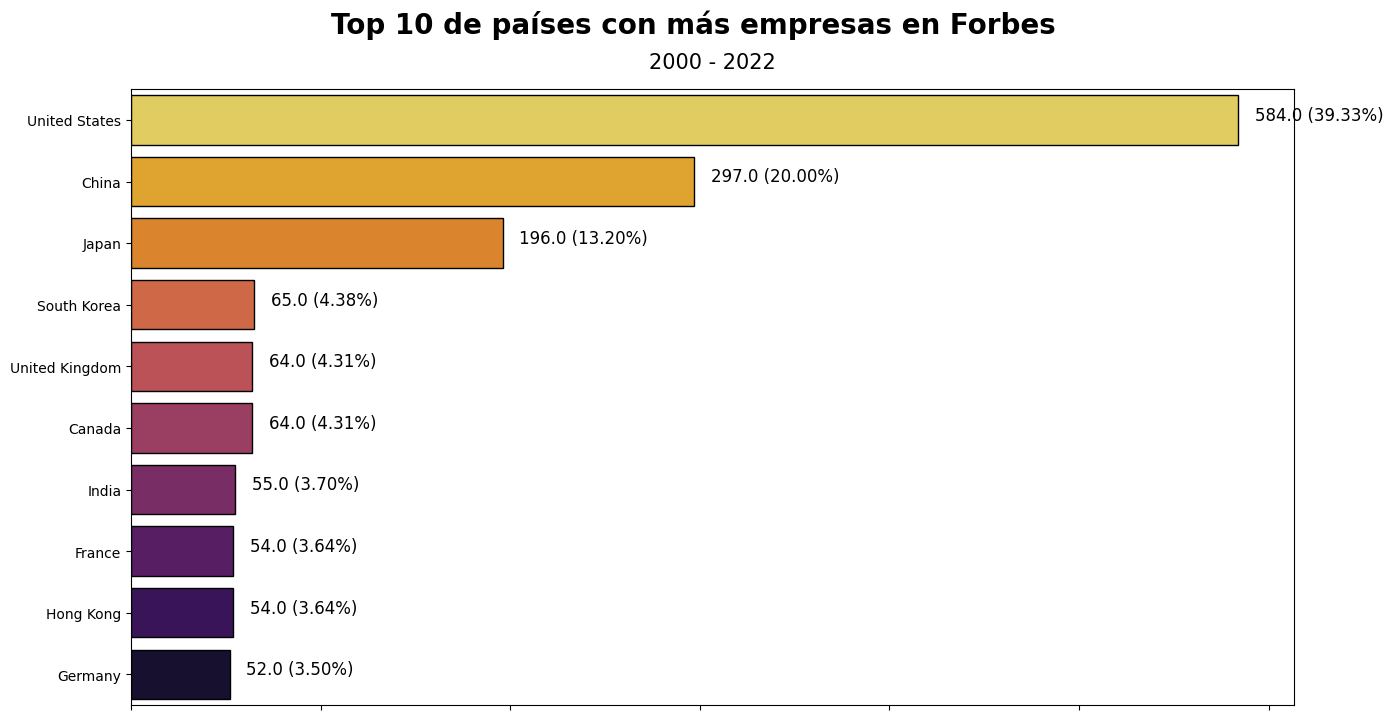

In [216]:
# Tamaño de la figura
fig, ax = plt.subplots(figsize=(15, 8))

# Crear un DataFrame con las columnas relevantes de top_10_paises_ca
data_for_plot = data_2022_union[data_2022_union['Pais'].isin(top_10_paises_ca['Pais'])]

# Countplot ordenado de manera ascendente
sns.countplot(y='Pais', data=data_for_plot, order=data_for_plot['Pais'].value_counts().index,
              edgecolor='black', palette='inferno_r', ax=ax)

# Obtener el total de empresas
total_empresas = len(data_for_plot)

# Añadir etiquetas en las barras
for i, p in enumerate(ax.patches):
    width = p.get_width()
    value = p.get_width()
    percentage = (value / total_empresas) * 100

    x = p.get_x() + width + 5
    y = p.get_y() + p.get_height() / 2

    # Añadir etiquetas
    ax.annotate(f'{value} ({percentage:.2f}%)', (x, y), xytext=(5, 0), textcoords='offset points', fontsize=12, color='black')

# Títulos y etiquetas
ax.set_xticklabels([])
plt.suptitle('Top 10 de países con más empresas en Forbes', fontsize=20, weight='bold')
plt.title('2000 - 2022', fontsize=15, pad=15)
plt.ylabel('')
plt.xlabel('')

# Mostrar el gráfico
plt.show()

**2. ¿Cuál es el Top 4 de países con más empresas en el área de tecnología y de telecomunicaciones?**



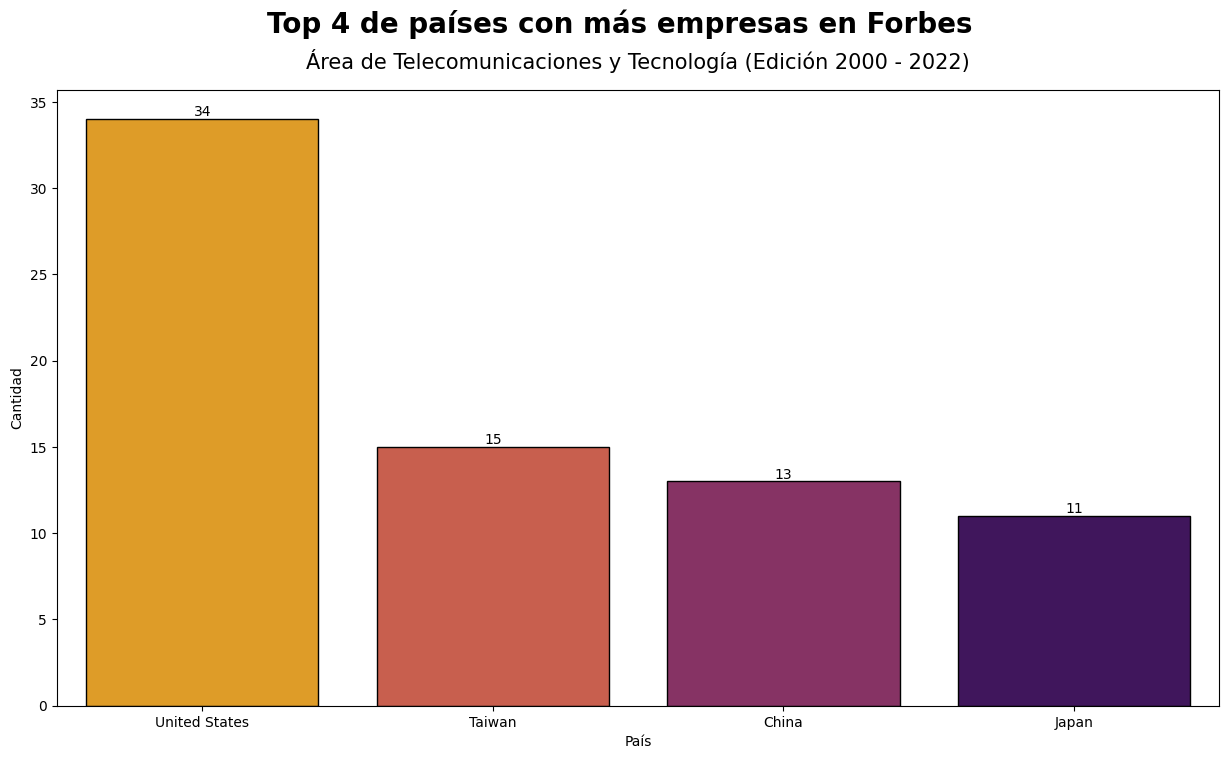

In [217]:
# Filtrar el DataFrame para incluir solo empresas de tecnología y telecomunicaciones
tecnologia_telecom = data_2022_union[data_2022_union['Industria'].isin(['Technology Hardware & Equipment', 'Semiconductors', 'Software & Services', 'Telecommunications'])]

# Obtener el Top 4 de países con más empresas en tecnología y telecomunicaciones
top_4_paises_tecnologia = tecnologia_telecom['Pais'].value_counts().head(4)

# Crear el gráfico de barras
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=top_4_paises_tecnologia.index, y=top_4_paises_tecnologia.values,
                 palette='inferno_r', saturation=0.75, width=0.8, edgecolor='black')

# Títulos y etiquetas
plt.suptitle('Top 4 de países con más empresas en Forbes', fontsize=20, weight='bold')
plt.title('Área de Telecomunicaciones y Tecnología (Edición 2000 - 2022)', fontsize=15, pad=15)
plt.ylabel('Cantidad')
plt.xlabel('País')

# Añadir etiquetas en las barras con los valores
for i, v in enumerate(top_4_paises_tecnologia.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.show()

**3. ¿Cuál fue el margen de pérdida de las 5 empresas que presentaron mayores perjuicios considerando el total de pérdidas registradas en la Industria de los Hoteles, Restaurantes y entretenimiento?**



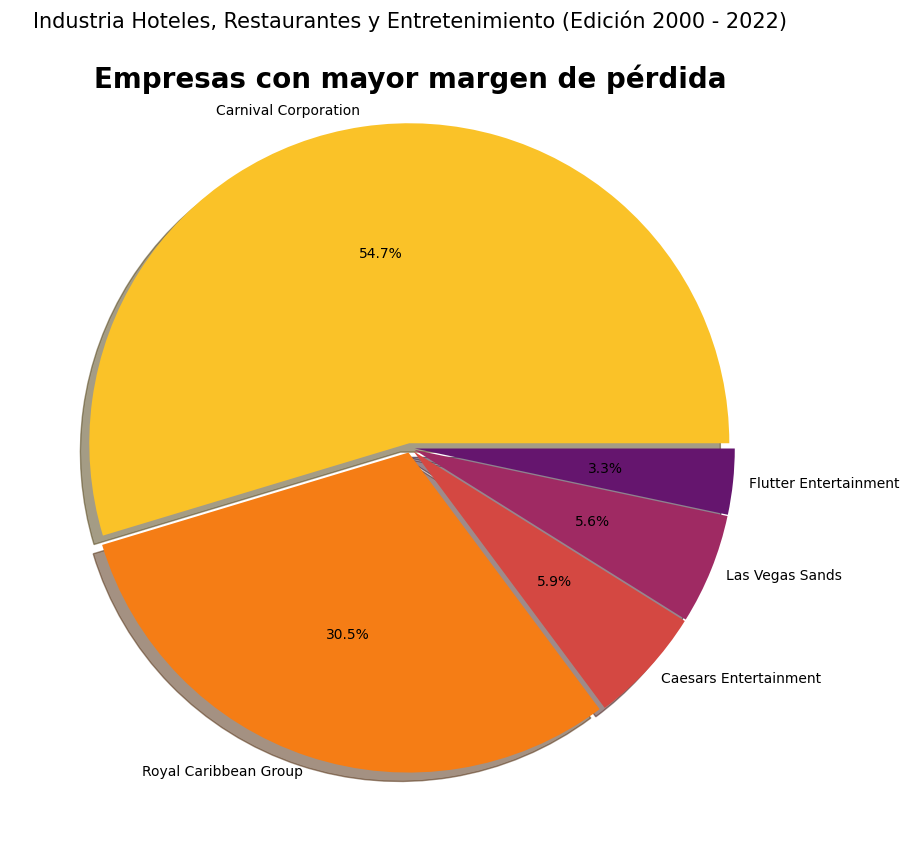

In [218]:
# Filtrar el DataFrame para la industria de Hoteles, Restaurantes y Entretenimiento
industria_hoteles = data_2022_union[data_2022_union['Industria'] == 'Hotels, Restaurants & Leisure']

# Ordenar las empresas por pérdidas en orden descendente y tomar las primeras 5
top_5_perdidas = industria_hoteles.sort_values(by='Ganancias', ascending=True).head(5)

# Calcular el margen de pérdida (Ganancias/Ingresos)
top_5_perdidas['Margen de Perdida'] = top_5_perdidas['Ganancias'] / top_5_perdidas['Ingresos']

# Calcular el porcentaje de pérdida tomando el 100% como la suma de las pérdidas de las 5 empresas
total_perdidas = top_5_perdidas['Ganancias'].sum()
top_5_perdidas['Porcentaje de Perdida'] = ((top_5_perdidas['Ganancias'] / total_perdidas) * 100).round(2)

# Crear una figura y un eje
fig = plt.figure(figsize=(15, 8))
eje = fig.add_axes([0, 0, 1, 1])

# Definir una lista de valores para la explosión de los segmentos
explodir = [0.015] * len(top_5_perdidas['Porcentaje de Perdida'])

# Ajustar la distancia de las etiquetas al centro del gráfico
plt.pie(top_5_perdidas['Porcentaje de Perdida'], labels=top_5_perdidas['Empresa'], autopct='%1.1f%%',
        colors=sns.color_palette('inferno_r'), explode=explodir, shadow=True, labeldistance=1.05)

# Títulos y etiquetas
plt.suptitle('Empresas con mayor margen de pérdida', fontsize=20, weight='bold')
plt.title('Industria Hoteles, Restaurantes y Entretenimiento (Edición 2000 - 2022)', fontsize=15, pad=15)

# Mostrar el gráfico
plt.show()

**4. Considerando a la Industria Petrolera en Asia, ¿Cuál o cuáles empresas superaron en más del 20% su margen de rentabilidad?**



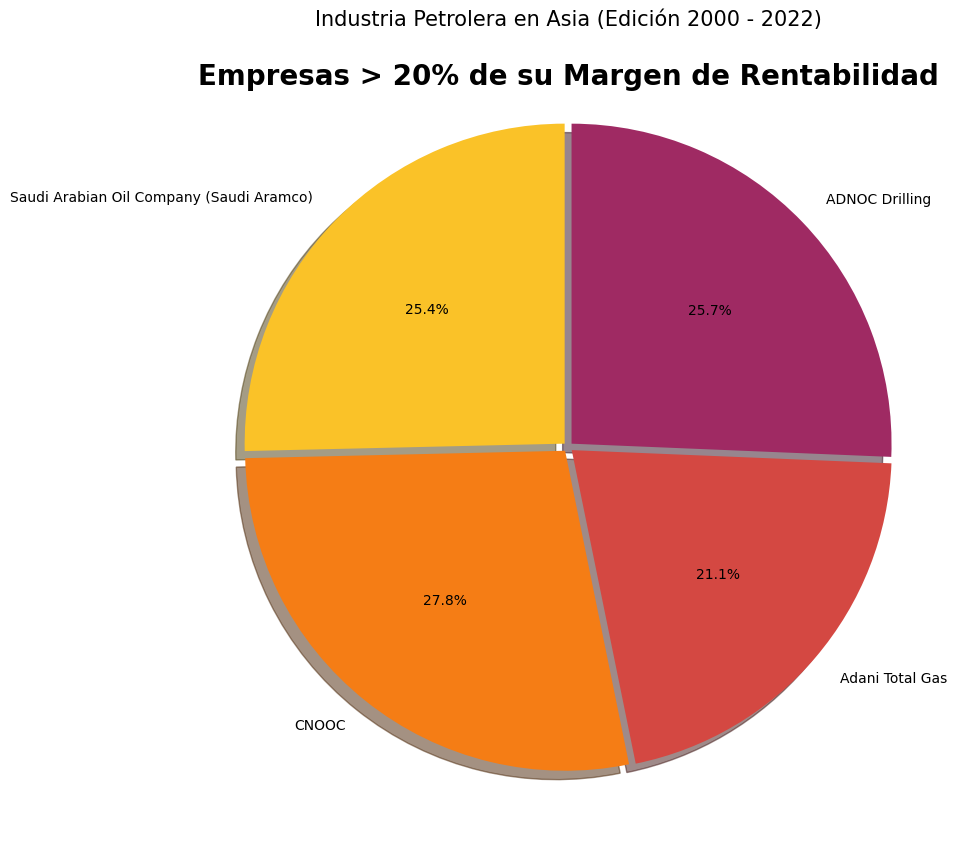

In [219]:
# Filtrar las empresas de la industria petrolera en Asia
petroleras_asia = data_2022_union[(data_2022_union['Industria'] == 'Oil & Gas Operations') & (data_2022_union['Continente'] == 'Asia')].copy()

# Calcular el margen de rentabilidad en porcentaje
petroleras_asia['Margen de Rentabilidad PTC'] = (petroleras_asia['Margen de Rentabilidad'] * 100).round(2)

# Filtrar las empresas que superaron en más del 20% su margen de rentabilidad
empresas_destacadas = petroleras_asia[petroleras_asia['Margen de Rentabilidad PTC'] > 20]

# Crear una figura y un eje
fig = plt.figure(figsize=(15, 8))
eje = fig.add_axes([0, 0, 1, 1])

# Definir una lista de valores para la explosión de los segmentos
explodir = [0.015] * len(empresas_destacadas['Margen de Rentabilidad'])

eje.pie(empresas_destacadas['Margen de Rentabilidad'], labels=empresas_destacadas['Empresa'], autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette('inferno_r'), explode=explodir, shadow=True, labeldistance=1.1)

plt.suptitle('Empresas > 20% de su Margen de Rentabilidad',fontsize=20,weight='bold')
plt.title('Industria Petrolera en Asia (Edición 2000 - 2022)',fontsize=15,pad=15)
plt.show()

**5. ¿Cuáles fueron las empresas norteamericanas con el mayor porcentaje de rentabilidad por industria?**



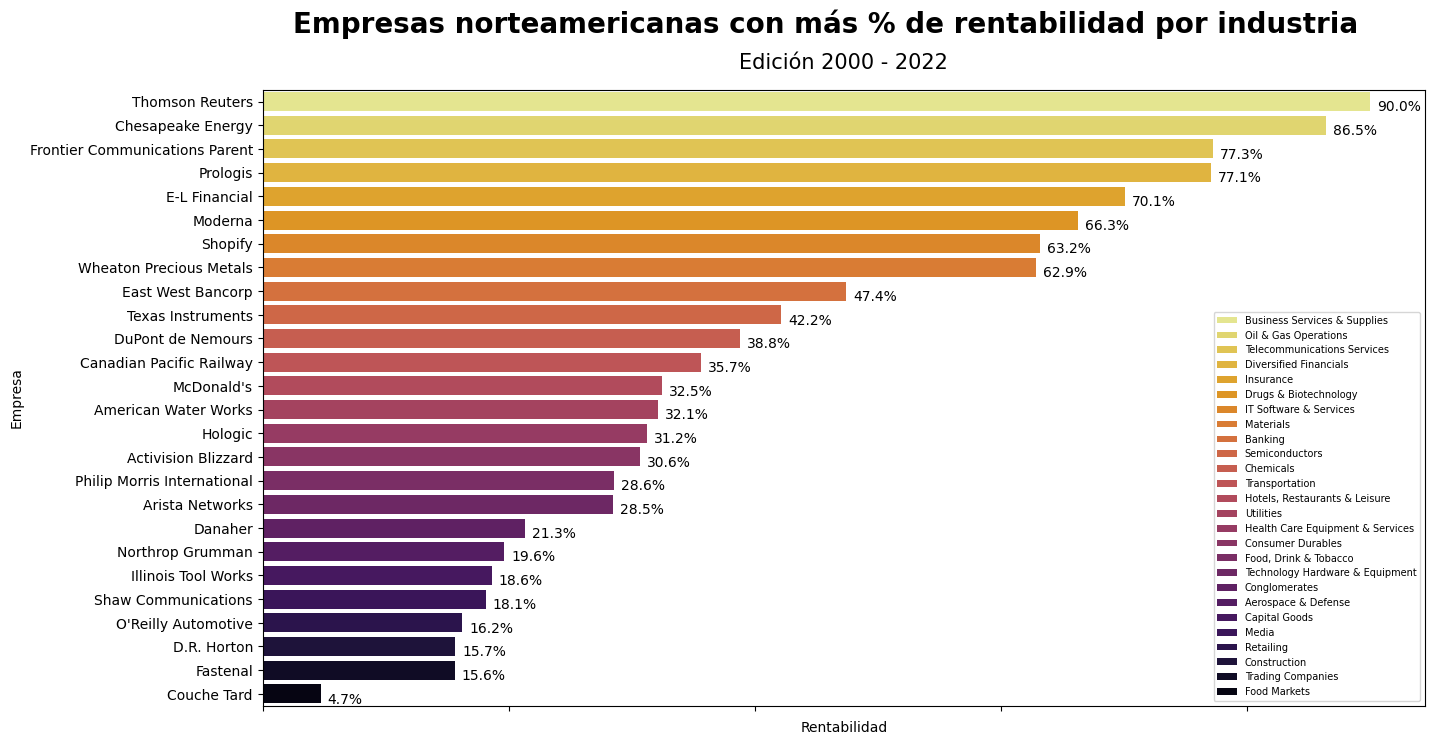

In [220]:
# Filtrar las empresas norteamericanas con un margen de rentabilidad menor a 1 (menor al 100%)
empresas_norteamericanas = data_2022_union[(data_2022_union['Continente'] == 'North America') & (data_2022_union['Margen de Rentabilidad'] < 1)]

# Obtener el índice de las empresas con el mayor margen de rentabilidad en cada industria
mayor_rentabilidad = empresas_norteamericanas.groupby('Industria')['Margen de Rentabilidad'].idxmax()

# Seleccionar las columnas relevantes para mostrar los resultados
empresas_rentabilidad = empresas_norteamericanas.loc[mayor_rentabilidad, ['Industria', 'Empresa', 'Margen de Rentabilidad']]

# Calcular el porcentaje de rentabilidad multiplicando por 100
empresas_rentabilidad['% Rentabilidad'] = (empresas_rentabilidad['Margen de Rentabilidad'] * 100).round(2)

# Crear el gráfico utilizando Seaborn
plt.figure(figsize=(15, 8))
data_sorted = empresas_rentabilidad.sort_values('% Rentabilidad', ascending=False)

ax = sns.barplot(data=data_sorted, x='% Rentabilidad', y='Empresa', hue='Industria', dodge=False, palette='inferno_r')
ax.set_xticklabels([])

# Personalizar el gráfico
plt.suptitle('Empresas norteamericanas con más % de rentabilidad por industria', fontsize=20, weight='bold')
plt.title('Edición 2000 - 2022', fontsize=15, pad=15)
plt.xlabel('Rentabilidad')
plt.ylabel('Empresa')

# Ajustar el tamaño de la leyenda
plt.legend(fontsize=7, loc='lower right')

# Añadir etiquetas de valores en las barras
for p in ax.patches:
    width = p.get_width()
    value = p.get_width()
    x = p.get_x() + width
    y = p.get_y() + p.get_height()
    ax.annotate(f'{value:.1f}%', (x, y), xytext=(5, 0), textcoords='offset points')

# Mostrar el gráfico
plt.show()

**6. Excluyendo a la industria Bancaria, ¿Cuáles fueron las empresas europeas con mayores pérdidas registradas por industria a nivel global?**



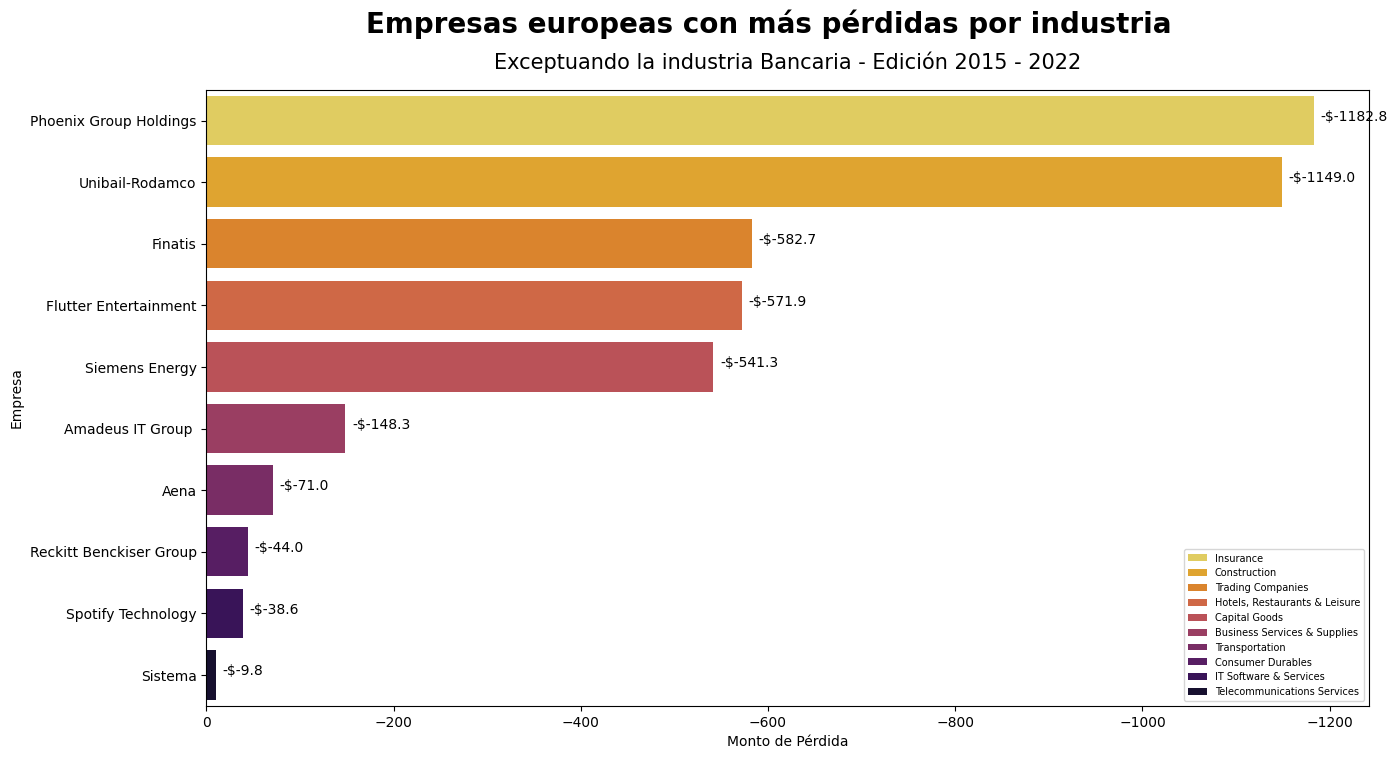

In [221]:
# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=empresas_perdidas_ca, x='Ganancias', y='Empresa', hue='Industria', dodge=False, palette='inferno_r')

# Invertir las etiquetas del eje x
ax.invert_xaxis()

# Títulos y etiquetas
plt.suptitle('Empresas europeas con más pérdidas por industria', fontsize=20, weight='bold')
plt.title('Exceptuando la industria Bancaria - Edición 2015 - 2022', fontsize=15, pad=15)
plt.xlabel('Monto de Pérdida')
plt.ylabel('Empresa')

# Ajustar el tamaño de la leyenda
plt.legend(fontsize=7, loc='lower right')

# Añadir etiquetas de valores en las barras
for p in ax.patches:
    width = p.get_width()
    value = p.get_width()
    x = p.get_x() + width
    y = p.get_y() + p.get_height() / 2
    ax.annotate(f'-${value:.1f}', (x, y), xytext=(5, 0), textcoords='offset points')

# Mostrar el gráfico
plt.show()

**7. ¿Cuál fue la distribución de Ingresos y Activos con respecto a las ganancias de los bancos cuyos activos no superan los 30000 millones de dólares?**



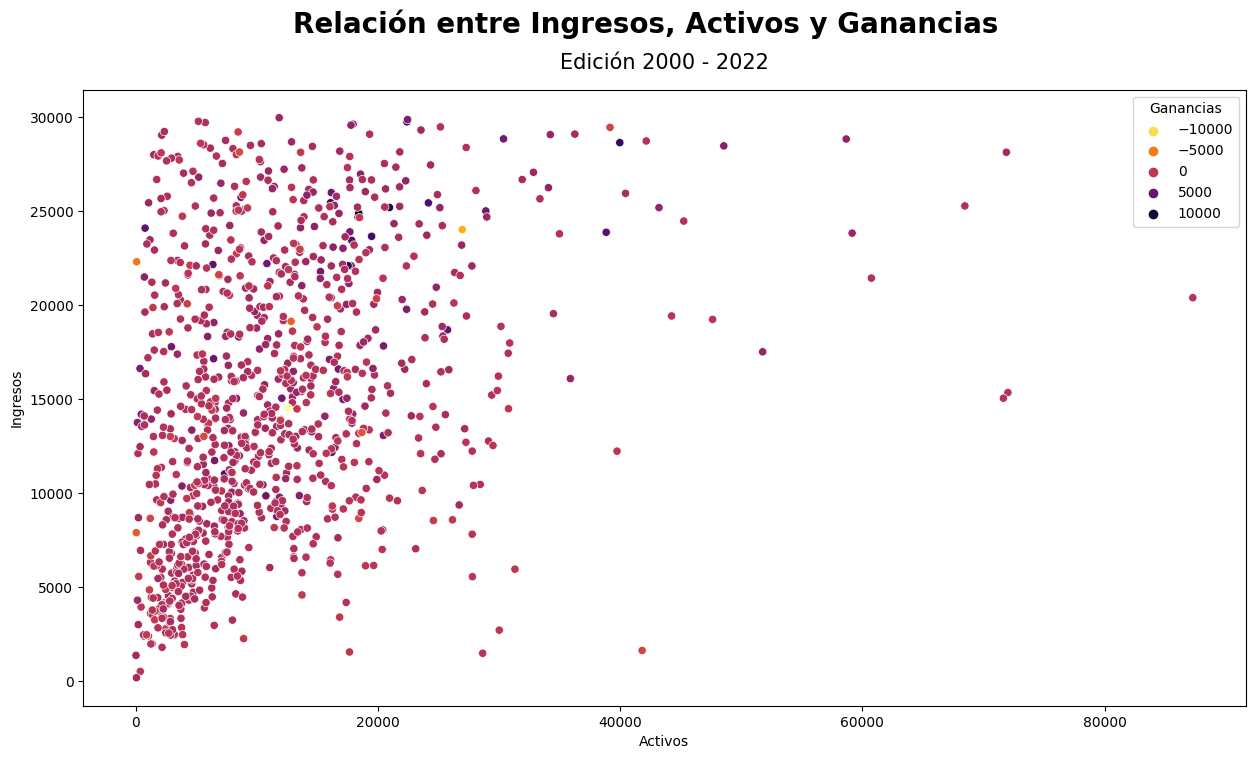

In [222]:
# Tamaño de la figura
plt.figure(figsize=(15, 8))

# Filtrar los datos
data_filtrada = data_2022_union[data_2022_union['Activos'] <= 30000]

# Descripción estadística de los ingresos y activos
distribucion_ingreso = data_filtrada['Ingresos'].describe()
distribucion_activo = data_filtrada['Activos'].describe()

# Crear un gráfico de dispersión utilizando Seaborn
sns.scatterplot(data=data_filtrada, x='Ingresos', y='Activos', hue='Ganancias', palette='inferno_r')

# Personalizar el gráfico
plt.suptitle('Relación entre Ingresos, Activos y Ganancias', fontsize=20, weight='bold')
plt.title('Edición 2000 - 2022', fontsize=15, pad=15)
plt.xlabel('Activos')
plt.ylabel('Ingresos')

# Mostrar el gráfico
plt.show()

**8. Considerando el histórico de valores de las acciones en el año 2022 de las 5 empresas de tu elección (Paso 2), Indica ¿Cuál fue la mejor semana para comprar y cuál para vender respectivamente? (Se compra cuando el precio es bajo, y se vende cuando el precio es alto)**

### **Apple**

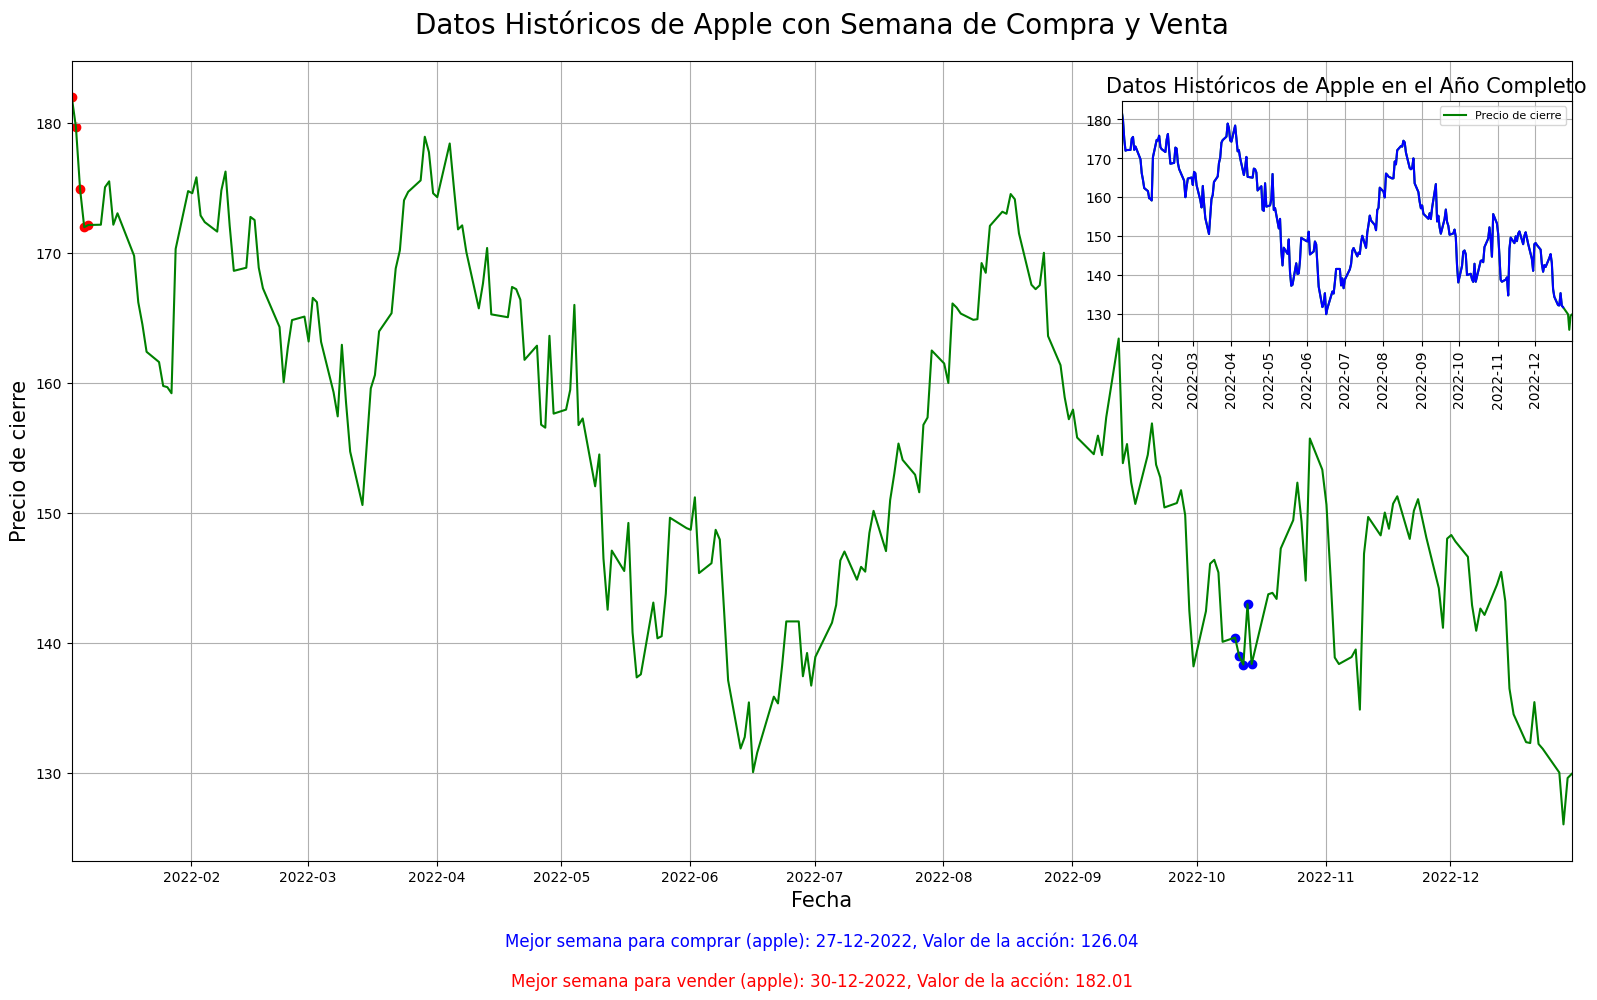

In [223]:
# Evitar la advertencia creando una copia explícita
data_hist_apple_copy = data_hist_apple.copy()

# Crear una figura con un tamaño específico
fig = plt.figure(figsize=(15, 8))

# Agregar un conjunto de ejes principal que ocupe toda la figura
eje = fig.add_axes([0, 0, 1, 1])

# Agregar un conjunto de ejes secundario con una posición y tamaño personalizados
eje_2 = fig.add_axes([0.7, 0.65, 0.3, 0.3])

# Configuración del primer conjunto de ejes (eje) para la semana de venta
eje.grid(True)
eje.plot(data_hist_apple_copy['datetime'], data_hist_apple_copy['close'], color='g')
eje.scatter(data_hist_apple_copy['datetime'][data_hist_apple_copy['datetime'].dt.isocalendar().week == semana_venta],
            data_hist_apple_copy['close'][data_hist_apple_copy['datetime'].dt.isocalendar().week == semana_venta],
            color='red', marker='o', label='Venta')
eje.scatter(data_hist_apple_copy['datetime'][data_hist_apple_copy['datetime'].dt.isocalendar().week == semana_compra],
            data_hist_apple_copy['close'][data_hist_apple_copy['datetime'].dt.isocalendar().week == semana_compra],
            color='blue', marker='o', label='Compra')
eje.set_xlim(data_hist_apple_copy['datetime'].min(), data_hist_apple_copy['datetime'].max())
eje.set_title('Datos Históricos de Apple con Semana de Compra y Venta', fontsize=20, pad=20)
# eje.legend(['Precio de cierre', 'Venta', 'Compra'], loc='lower right', fontsize=15)
eje.set_ylabel('Precio de cierre', fontsize=15)
eje.set_xlabel('Fecha', fontsize=15)

# Filtrar los datos para resaltar el período antes del 1 de diciembre de 2022 (azul_izq) y después del 30 de diciembre de 2022 (azul_der)
azul_izq = data_hist_apple_copy['datetime'] < pd.Timestamp(2022, 12, 27)
azul_der = data_hist_apple_copy['datetime'] > pd.Timestamp(2022, 12, 30)

# Configuración del segundo conjunto de ejes (eje_2) para el año completo
eje_2.plot(data_hist_apple_copy['datetime'], data_hist_apple_copy['close'], color='g')
eje_2.plot(data_hist_apple_copy[azul_izq]['datetime'], data_hist_apple_copy[azul_izq]['close'], color='b')
eje_2.plot(data_hist_apple_copy[azul_der]['datetime'], data_hist_apple_copy[azul_der]['close'], color='b')
eje_2.set_xlim(data_hist_apple_copy['datetime'].min(), data_hist_apple_copy['datetime'].max())
eje_2.set_title('Datos Históricos de Apple en el Año Completo', fontsize=15)
eje_2.legend(['Precio de cierre'], loc='best', fontsize=8)
eje_2.set_ylabel('')
eje_2.set_xlabel('')
eje_2.grid(True)

# Rotar las etiquetas del eje x en el segundo gráfico
plt.xticks(rotation=90)

# Imprimir las fechas y valores para cada empresa
info_compra = "Mejor semana para comprar (apple): 27-12-2022, Valor de la acción: 126.04"
info_venta = "Mejor semana para vender (apple): 30-12-2022, Valor de la acción: 182.01"

# Agregar etiquetas al gráfico
eje.text(0.5, -0.1, info_compra, ha='center', va='center', transform=eje.transAxes, fontsize=12, color='blue')
eje.text(0.5, -0.15, info_venta, ha='center', va='center', transform=eje.transAxes, fontsize=12, color='red')

# Mostrar el gráfico
plt.show()

### **Oracle**

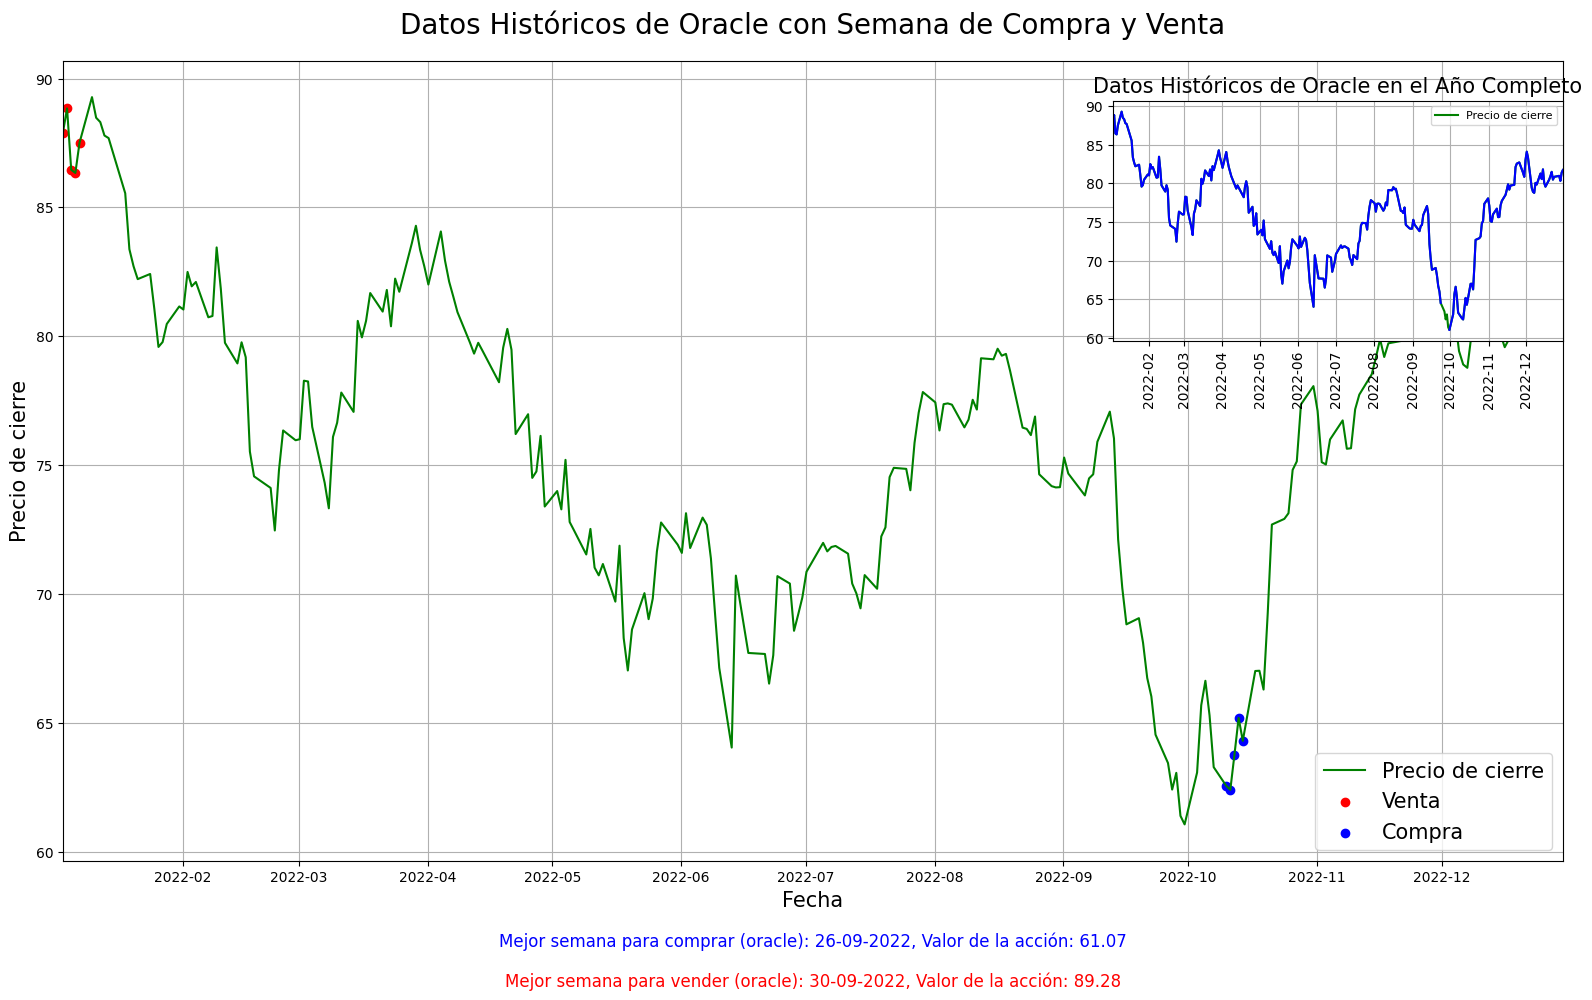

In [224]:
# Evitar la advertencia creando una copia explícita
data_hist_oracle_copy = data_hist_oracle.copy()

# Crear una figura con un tamaño específico
fig = plt.figure(figsize=(15, 8))

# Agregar un conjunto de ejes principal que ocupe toda la figura
eje = fig.add_axes([0, 0, 1, 1])

# Agregar un conjunto de ejes secundario con una posición y tamaño personalizados
eje_2 = fig.add_axes([0.7, 0.65, 0.3, 0.3])

# Configuración del primer conjunto de ejes (eje) para la semana de venta
eje.grid(True)
eje.plot(data_hist_oracle_copy['datetime'], data_hist_oracle_copy['close'], color='g')
eje.scatter(data_hist_oracle_copy['datetime'][data_hist_oracle_copy['datetime'].dt.isocalendar().week == semana_venta],
            data_hist_oracle_copy['close'][data_hist_oracle_copy['datetime'].dt.isocalendar().week == semana_venta],
            color='red', marker='o', label='Venta')
eje.scatter(data_hist_oracle_copy['datetime'][data_hist_oracle_copy['datetime'].dt.isocalendar().week == semana_compra],
            data_hist_oracle_copy['close'][data_hist_oracle_copy['datetime'].dt.isocalendar().week == semana_compra],
            color='blue', marker='o', label='Compra')
eje.set_xlim(data_hist_oracle_copy['datetime'].min(), data_hist_oracle_copy['datetime'].max())
eje.set_title('Datos Históricos de Oracle con Semana de Compra y Venta', fontsize=20, pad=20)
eje.legend(['Precio de cierre', 'Venta', 'Compra'], loc='lower right', fontsize=15)
eje.set_ylabel('Precio de cierre', fontsize=15)
eje.set_xlabel('Fecha', fontsize=15)

azul_izq = data_hist_oracle_copy['datetime'] < pd.Timestamp(2022,9,26)
azul_der = data_hist_oracle_copy['datetime'] > pd.Timestamp(2022,9,30)

# Configuración del segundo conjunto de ejes (eje_2) para el año completo
eje_2.plot(data_hist_oracle_copy['datetime'], data_hist_oracle_copy['close'], color='g')
eje_2.plot(data_hist_oracle_copy[azul_izq]['datetime'], data_hist_oracle_copy[azul_izq]['close'], color='b')
eje_2.plot(data_hist_oracle_copy[azul_der]['datetime'], data_hist_oracle_copy[azul_der]['close'], color='b')
eje_2.set_xlim(data_hist_oracle_copy['datetime'].min(), data_hist_oracle_copy['datetime'].max())
eje_2.set_title('Datos Históricos de Oracle en el Año Completo', fontsize=15)
eje_2.legend(['Precio de cierre'], loc='best', fontsize=8)
eje_2.set_ylabel('')
eje_2.set_xlabel('')
eje_2.grid(True)

# Rotar las etiquetas del eje x en el segundo gráfico
plt.xticks(rotation=90)

# Imprimir las fechas y valores para cada empresa
info_compra = "Mejor semana para comprar (oracle): 26-09-2022, Valor de la acción: 61.07"
info_venta = "Mejor semana para vender (oracle): 30-09-2022, Valor de la acción: 89.28"

# Agregar etiquetas al gráfico
eje.text(0.5, -0.1, info_compra, ha='center', va='center', transform=eje.transAxes, fontsize=12, color='blue')
eje.text(0.5, -0.15, info_venta, ha='center', va='center', transform=eje.transAxes, fontsize=12, color='red')

# Mostrar el gráfico
plt.show()

### **Microsoft**

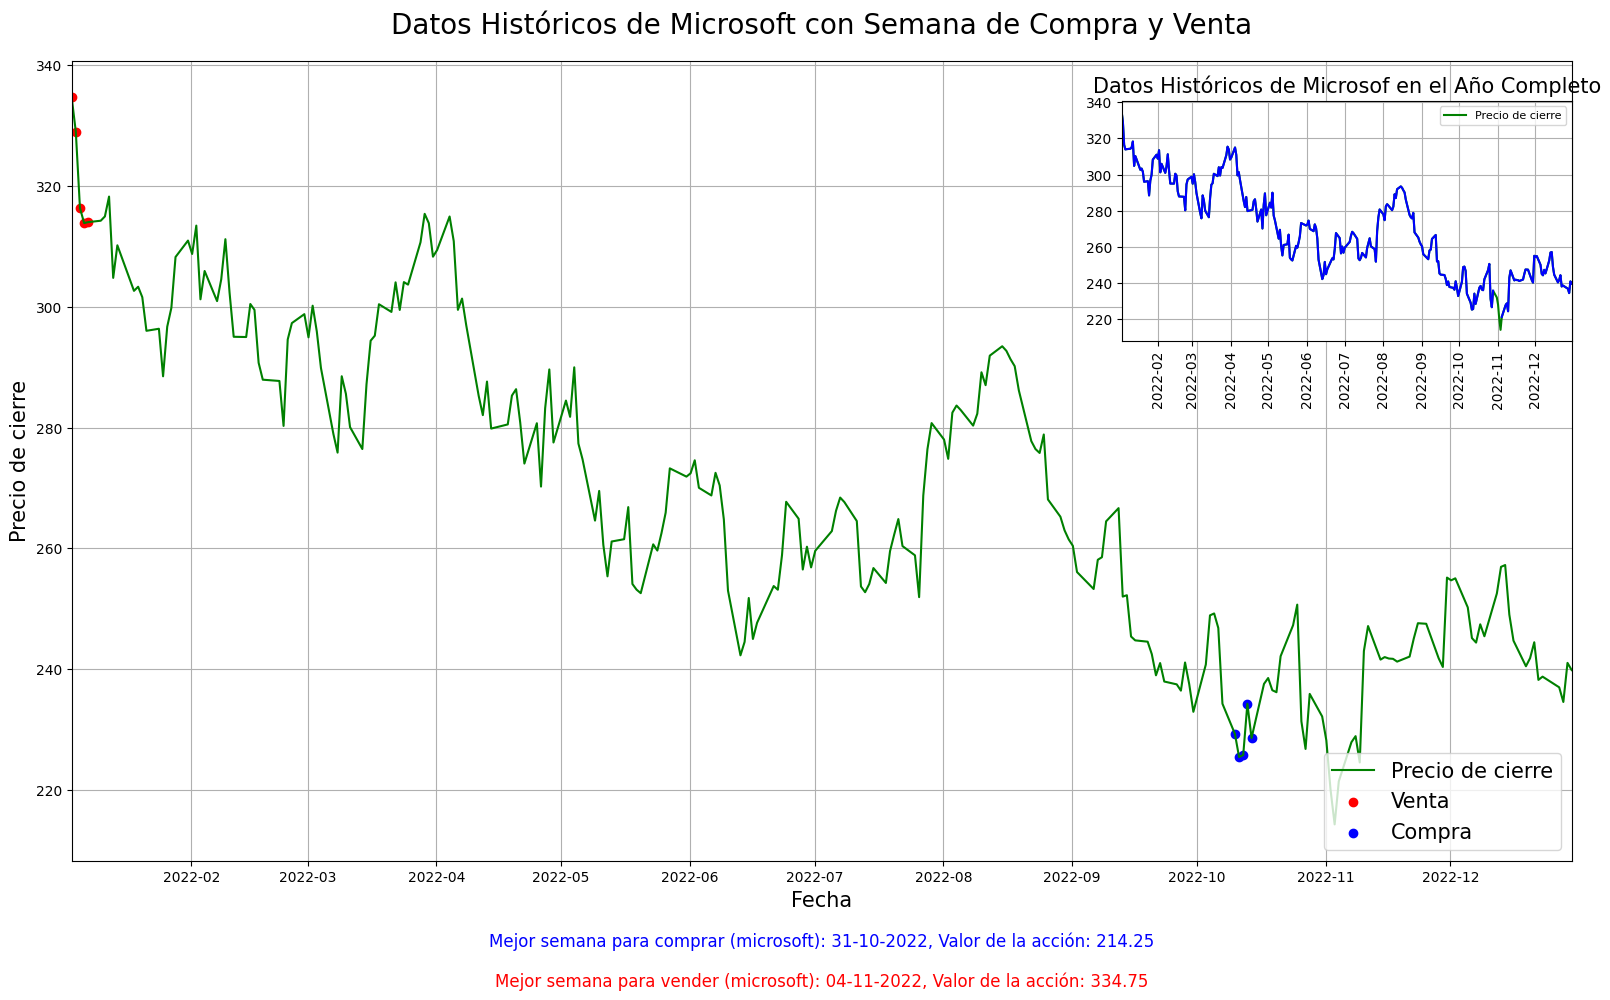

In [225]:
# Evitar la advertencia creando una copia explícita
data_hist_microsoft_copy = data_hist_microsoft.copy()

# Crear una figura con un tamaño específico
fig = plt.figure(figsize=(15, 8))

# Agregar un conjunto de ejes principal que ocupe toda la figura
eje = fig.add_axes([0, 0, 1, 1])

# Agregar un conjunto de ejes secundario con una posición y tamaño personalizados
eje_2 = fig.add_axes([0.7, 0.65, 0.3, 0.3])

# Configuración del primer conjunto de ejes (eje) para la semana de venta
eje.grid(True)
eje.plot(data_hist_microsoft_copy['datetime'], data_hist_microsoft_copy['close'], color='g')
eje.scatter(data_hist_microsoft_copy['datetime'][data_hist_microsoft_copy['datetime'].dt.isocalendar().week == semana_venta],
            data_hist_microsoft_copy['close'][data_hist_microsoft_copy['datetime'].dt.isocalendar().week == semana_venta],
            color='red', marker='o', label='Venta')
eje.scatter(data_hist_microsoft_copy['datetime'][data_hist_microsoft_copy['datetime'].dt.isocalendar().week == semana_compra],
            data_hist_microsoft_copy['close'][data_hist_microsoft_copy['datetime'].dt.isocalendar().week == semana_compra],
            color='blue', marker='o', label='Compra')
eje.set_xlim(data_hist_microsoft_copy['datetime'].min(), data_hist_microsoft_copy['datetime'].max())
eje.set_title('Datos Históricos de Microsoft con Semana de Compra y Venta', fontsize=20, pad=20)
eje.legend(['Precio de cierre', 'Venta', 'Compra'], loc='lower right', fontsize=15)
eje.set_ylabel('Precio de cierre', fontsize=15)
eje.set_xlabel('Fecha', fontsize=15)

azul_izq = data_hist_microsoft_copy['datetime'] < pd.Timestamp(2022,10,31)
azul_der = data_hist_microsoft_copy['datetime'] > pd.Timestamp(2022,11,4)

# Configuración del segundo conjunto de ejes (eje_2) para el año completo
eje_2.plot(data_hist_microsoft_copy['datetime'], data_hist_microsoft_copy['close'], color='g')
eje_2.plot(data_hist_microsoft_copy[azul_izq]['datetime'], data_hist_microsoft_copy[azul_izq]['close'], color='b')
eje_2.plot(data_hist_microsoft_copy[azul_der]['datetime'], data_hist_microsoft_copy[azul_der]['close'], color='b')
eje_2.set_xlim(data_hist_microsoft_copy['datetime'].min(), data_hist_microsoft_copy['datetime'].max())
eje_2.set_title('Datos Históricos de Microsof en el Año Completo', fontsize=15)
eje_2.legend(['Precio de cierre'], loc='best', fontsize=8)
eje_2.set_ylabel('')
eje_2.set_xlabel('')
eje_2.grid(True)

# Rotar las etiquetas del eje x en el segundo gráfico
plt.xticks(rotation=90)

# Imprimir las fechas y valores para cada empresa
info_compra = "Mejor semana para comprar (microsoft): 31-10-2022, Valor de la acción: 214.25"
info_venta = "Mejor semana para vender (microsoft): 04-11-2022, Valor de la acción: 334.75"

# Agregar etiquetas al gráfico
eje.text(0.5, -0.1, info_compra, ha='center', va='center', transform=eje.transAxes, fontsize=12, color='blue')
eje.text(0.5, -0.15, info_venta, ha='center', va='center', transform=eje.transAxes, fontsize=12, color='red')

# Mostrar el gráfico
plt.show()

### **Nvidia**

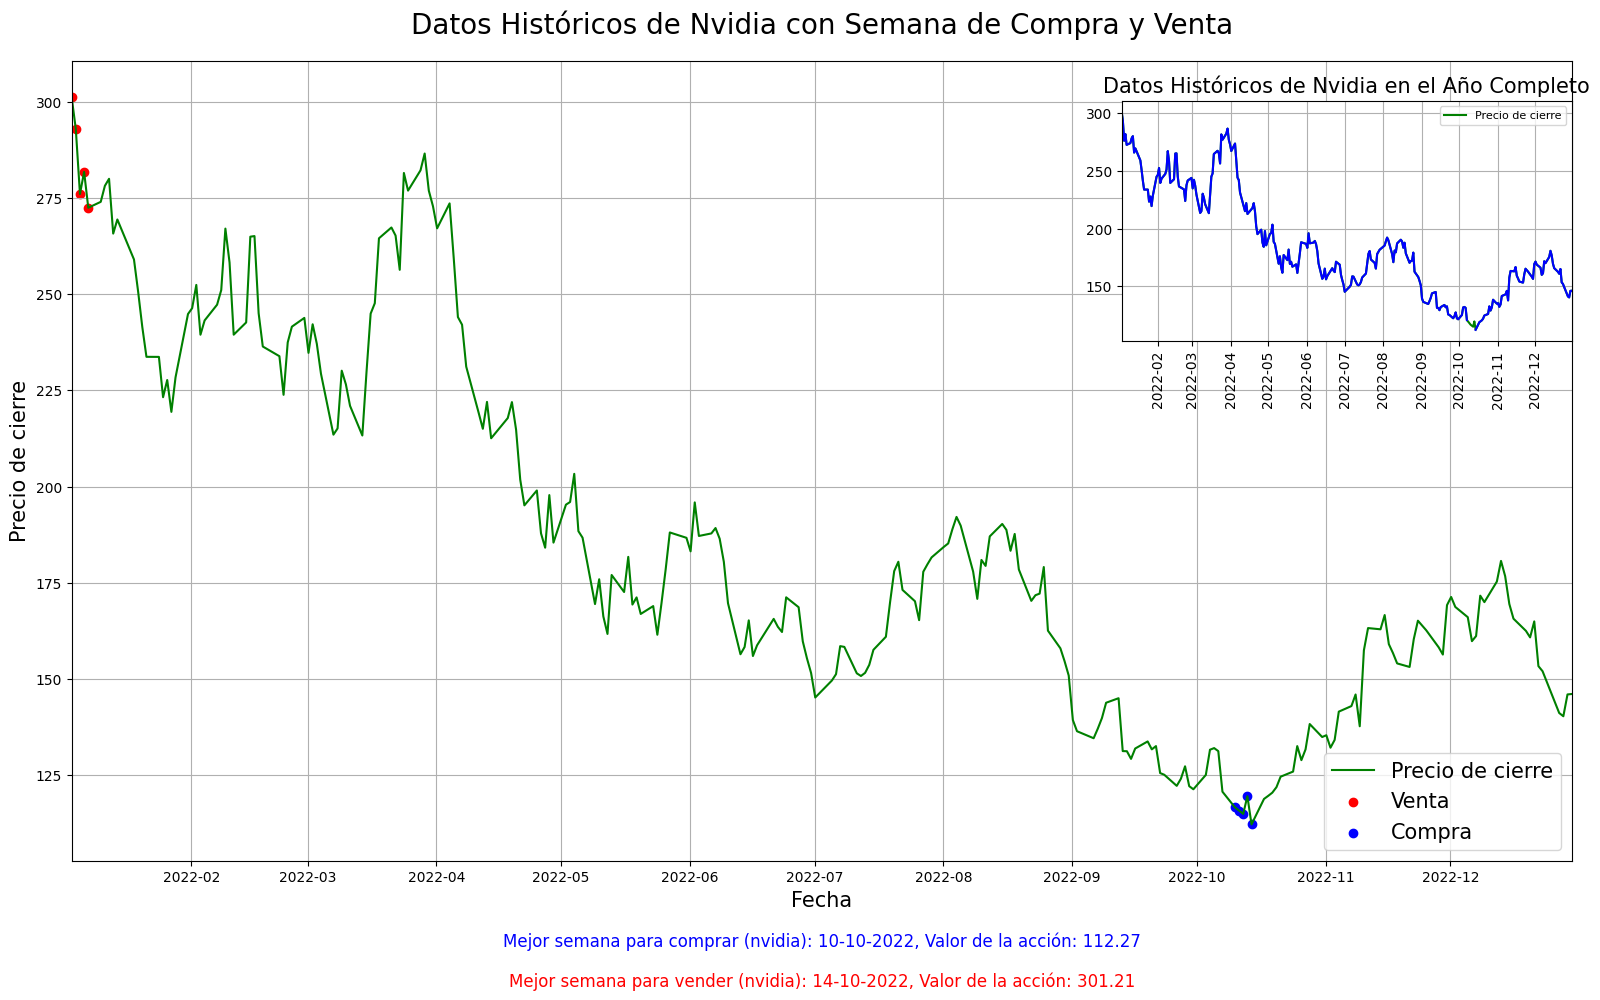

In [226]:
# Evitar la advertencia creando una copia explícita
data_hist_nvidia_copy = data_hist_nvidia.copy()

# Crear una figura con un tamaño específico
fig = plt.figure(figsize=(15, 8))

# Agregar un conjunto de ejes principal que ocupe toda la figura
eje = fig.add_axes([0, 0, 1, 1])

# Agregar un conjunto de ejes secundario con una posición y tamaño personalizados
eje_2 = fig.add_axes([0.7, 0.65, 0.3, 0.3])

# Configuración del primer conjunto de ejes (eje) para la semana de venta
eje.grid(True)
eje.plot(data_hist_nvidia_copy['datetime'], data_hist_nvidia_copy['close'], color='g')
eje.scatter(data_hist_nvidia_copy['datetime'][data_hist_nvidia_copy['datetime'].dt.isocalendar().week == semana_venta],
            data_hist_nvidia_copy['close'][data_hist_nvidia_copy['datetime'].dt.isocalendar().week == semana_venta],
            color='red', marker='o', label='Venta')
eje.scatter(data_hist_nvidia_copy['datetime'][data_hist_nvidia_copy['datetime'].dt.isocalendar().week == semana_compra],
            data_hist_nvidia_copy['close'][data_hist_nvidia_copy['datetime'].dt.isocalendar().week == semana_compra],
            color='blue', marker='o', label='Compra')
eje.set_xlim(data_hist_nvidia_copy['datetime'].min(), data_hist_nvidia_copy['datetime'].max())
eje.set_title('Datos Históricos de Nvidia con Semana de Compra y Venta', fontsize=20, pad=20)
eje.legend(['Precio de cierre', 'Venta', 'Compra'], loc='lower right', fontsize=15)
eje.set_ylabel('Precio de cierre', fontsize=15)
eje.set_xlabel('Fecha', fontsize=15)

azul_izq = data_hist_nvidia_copy['datetime'] < pd.Timestamp(2022,10,10)
azul_der = data_hist_nvidia_copy['datetime'] > pd.Timestamp(2022,10,14)

# Configuración del segundo conjunto de ejes (eje_2) para el año completo
eje_2.plot(data_hist_nvidia_copy['datetime'], data_hist_nvidia_copy['close'], color='g')
eje_2.plot(data_hist_nvidia_copy[azul_izq]['datetime'], data_hist_nvidia_copy[azul_izq]['close'], color='b')
eje_2.plot(data_hist_nvidia_copy[azul_der]['datetime'], data_hist_nvidia_copy[azul_der]['close'], color='b')
eje_2.set_xlim(data_hist_nvidia_copy['datetime'].min(), data_hist_nvidia_copy['datetime'].max())
eje_2.set_title('Datos Históricos de Nvidia en el Año Completo', fontsize=15)
eje_2.legend(['Precio de cierre'], loc='best', fontsize=8)
eje_2.set_ylabel('')
eje_2.set_xlabel('')
eje_2.grid(True)

# Rotar las etiquetas del eje x en el segundo gráfico
plt.xticks(rotation=90)

# Imprimir las fechas y valores para cada empresa
info_compra = "Mejor semana para comprar (nvidia): 10-10-2022, Valor de la acción: 112.27"
info_venta = "Mejor semana para vender (nvidia): 14-10-2022, Valor de la acción: 301.21"

# Agregar etiquetas al gráfico
eje.text(0.5, -0.1, info_compra, ha='center', va='center', transform=eje.transAxes, fontsize=12, color='blue')
eje.text(0.5, -0.15, info_venta, ha='center', va='center', transform=eje.transAxes, fontsize=12, color='red')

# Mostrar el gráfico
plt.show()

### **Cisco**

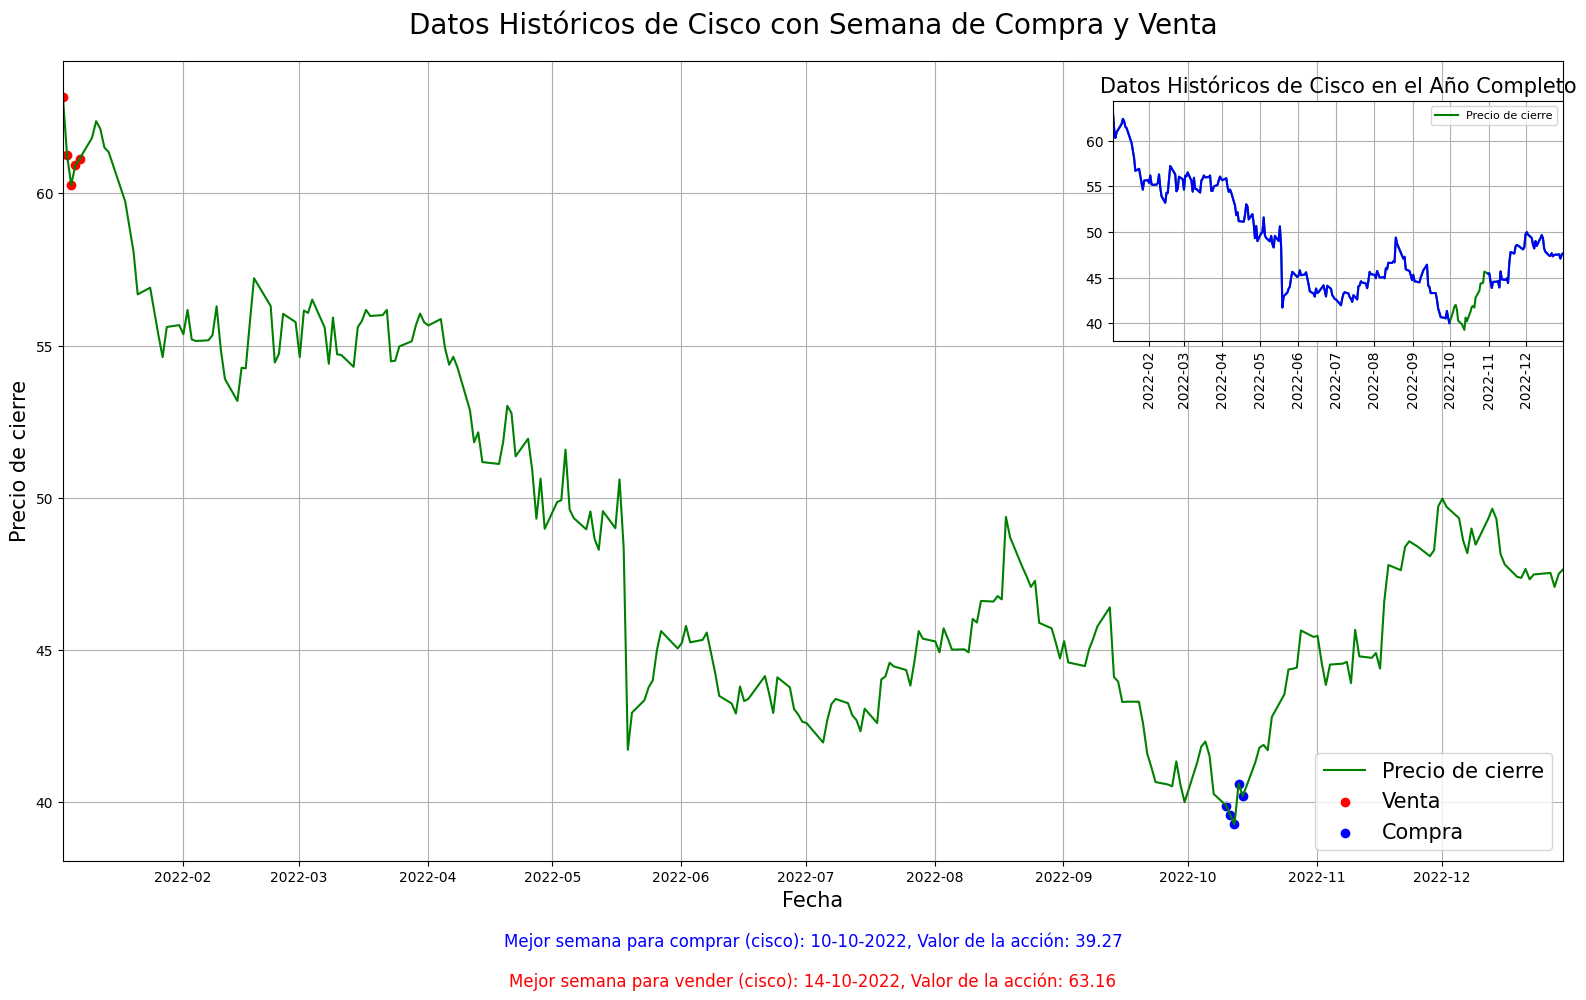

In [227]:
# Evitar la advertencia creando una copia explícita
data_hist_cisco_copy = data_hist_cisco.copy()

# Crear una figura con un tamaño específico
fig = plt.figure(figsize=(15, 8))

# Agregar un conjunto de ejes principal que ocupe toda la figura
eje = fig.add_axes([0, 0, 1, 1])

# Agregar un conjunto de ejes secundario con una posición y tamaño personalizados
eje_2 = fig.add_axes([0.7, 0.65, 0.3, 0.3])

# Configuración del primer conjunto de ejes (eje) para la semana de venta
eje.grid(True)
eje.plot(data_hist_cisco_copy['datetime'], data_hist_cisco_copy['close'], color='g')
eje.scatter(data_hist_cisco_copy['datetime'][data_hist_cisco_copy['datetime'].dt.isocalendar().week == semana_venta],
            data_hist_cisco_copy['close'][data_hist_cisco_copy['datetime'].dt.isocalendar().week == semana_venta],
            color='red', marker='o', label='Venta')
eje.scatter(data_hist_cisco_copy['datetime'][data_hist_cisco_copy['datetime'].dt.isocalendar().week == semana_compra],
            data_hist_cisco_copy['close'][data_hist_cisco_copy['datetime'].dt.isocalendar().week == semana_compra],
            color='blue', marker='o', label='Compra')
eje.set_xlim(data_hist_cisco_copy['datetime'].min(), data_hist_cisco_copy['datetime'].max())
eje.set_title('Datos Históricos de Cisco con Semana de Compra y Venta', fontsize=20, pad=20)
eje.legend(['Precio de cierre', 'Venta', 'Compra'], loc='lower right', fontsize=15)
eje.set_ylabel('Precio de cierre', fontsize=15)
eje.set_xlabel('Fecha', fontsize=15)

azul_izq = data_hist_cisco_copy['datetime'] < pd.Timestamp(2022,10,1)
azul_der = data_hist_cisco_copy['datetime'] > pd.Timestamp(2022,10,30)

# Configuración del segundo conjunto de ejes (eje_2) para el año completo
eje_2.plot(data_hist_cisco_copy['datetime'], data_hist_cisco_copy['close'], color='g')
eje_2.plot(data_hist_cisco_copy[azul_izq]['datetime'], data_hist_cisco_copy[azul_izq]['close'], color='b')
eje_2.plot(data_hist_cisco_copy[azul_der]['datetime'], data_hist_cisco_copy[azul_der]['close'], color='b')
eje_2.set_xlim(data_hist_cisco_copy['datetime'].min(), data_hist_cisco_copy['datetime'].max())
eje_2.set_title('Datos Históricos de Cisco en el Año Completo', fontsize=15)
eje_2.legend(['Precio de cierre'], loc='best', fontsize=8)
eje_2.set_ylabel('')
eje_2.set_xlabel('')
eje_2.grid(True)

# Rotar las etiquetas del eje x en el segundo gráfico
plt.xticks(rotation=90)

# Imprimir las fechas y valores para cada empresa
info_compra = f"Mejor semana para comprar ({empresa}): {start_of_week.strftime('%d-%m-%Y')}, Valor de la acción: {data_semanal.loc[semana_compra, 'min']}"
info_venta = f"Mejor semana para vender ({empresa}): {end_of_week.strftime('%d-%m-%Y')}, Valor de la acción: {data_semanal.loc[semana_venta, 'max']}"

# Agregar etiquetas al gráfico
eje.text(0.5, -0.1, info_compra, ha='center', va='center', transform=eje.transAxes, fontsize=12, color='blue')
eje.text(0.5, -0.15, info_venta, ha='center', va='center', transform=eje.transAxes, fontsize=12, color='red')

# Mostrar el gráfico
plt.show()

## **Cuestionario B**

Las siguientes preguntas se refieren al ranking Forbes 2000 considerando el periodo 2015 - 2022:



**1. ¿Cuál es el Top 10 de países con más empresas en Forbes para el periodo indicado?**



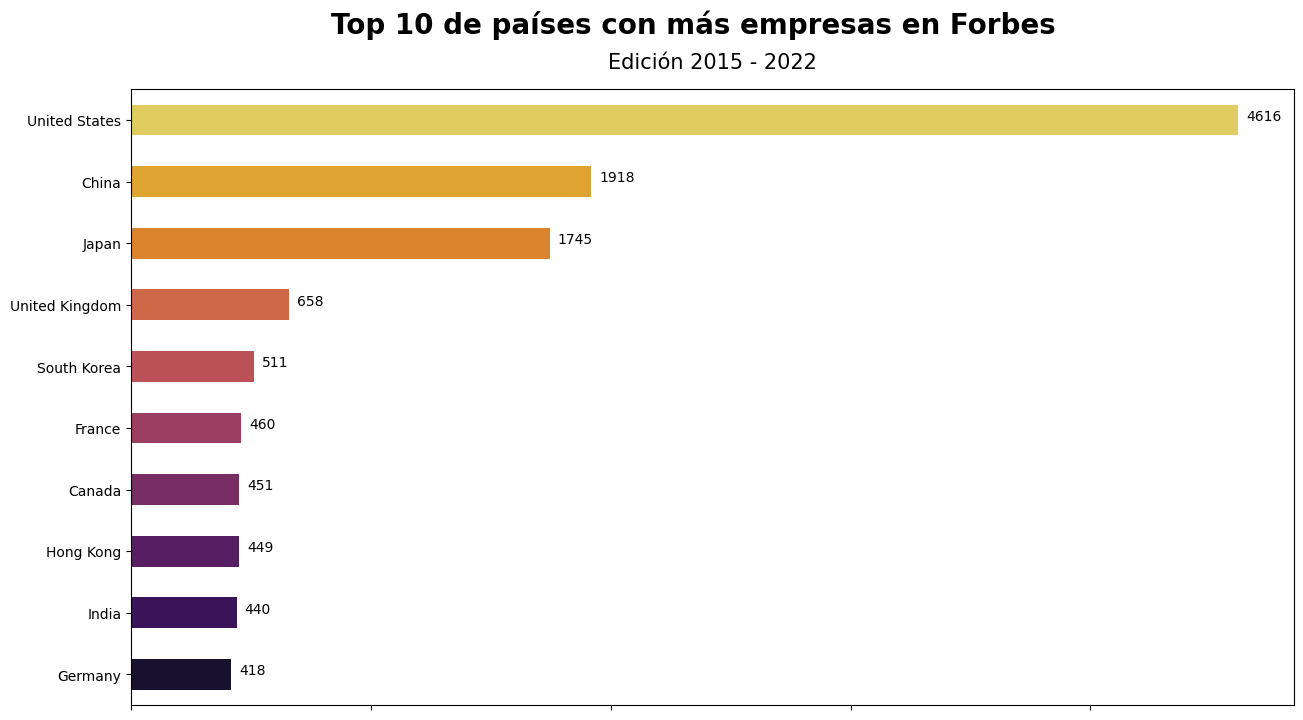

In [228]:
# Obtener los 10 países con más empresas en Forbes
top_10_paises = data_forbes_total['Pais'].value_counts().head(10).index

# Crear un gráfico de barras utilizando Seaborn
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=data_forbes_total, y='Pais', order=top_10_paises, palette='inferno_r', width=0.5)

# Ocultar las etiquetas del eje x
ax.set_xticklabels([])

# Títulos y etiquetas
plt.suptitle('Top 10 de países con más empresas en Forbes', fontsize=20, weight='bold')
plt.title('Edición 2015 - 2022', fontsize=15, pad=15)
plt.ylabel('')
plt.xlabel('')

# Añadir etiquetas en las barras con el valor de cada barra
for p in ax.patches:
    width = p.get_width()
    x = p.get_x() + width + 5
    y = p.get_y() + p.get_height() / 2
    value = int(width)  # Convertir el valor a entero
    ax.annotate(value, (x, y), xytext=(5, 0), textcoords='offset points')

# Mostrar el gráfico
plt.show()

**2. ¿Cuál es el Top 5 de países con más empresas en el área de tecnología y de telecomunicaciones?**



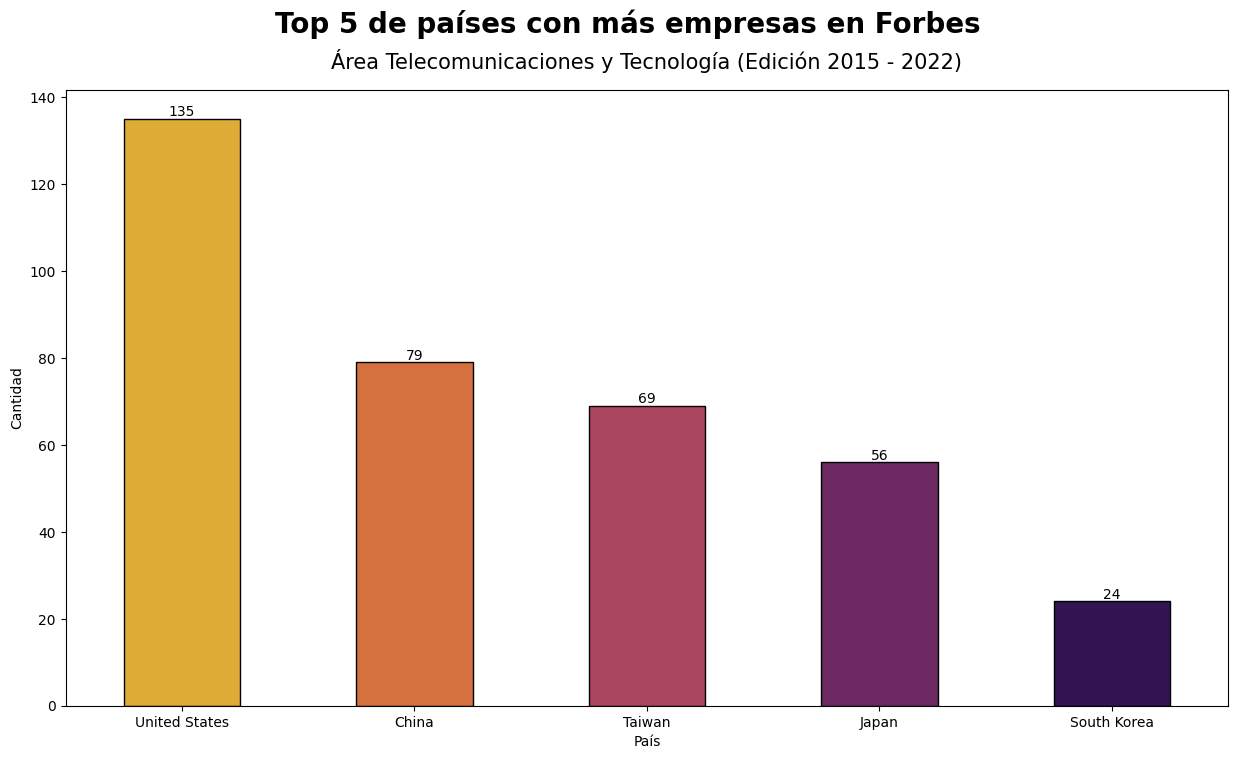

In [229]:
# Filtrar las empresas en el área de tecnología y telecomunicaciones
empresas_tecnologia = data_forbes_total[data_forbes_total['Industria'].isin(['Telecommunications Services', 'Technology Hardware & Equipment'])]

# Obtener el Top 5 de países con más empresas en esa área
top_5_paises_tecnologia = empresas_tecnologia['Pais'].value_counts().head(5)

# Crear un gráfico de barras utilizando Seaborn
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=top_5_paises_tecnologia.index, y=top_5_paises_tecnologia.values,
                 palette='inferno_r', width=0.5, edgecolor='black')

# Títulos y etiquetas
plt.suptitle('Top 5 de países con más empresas en Forbes', fontsize=20, weight='bold')
plt.title('Área Telecomunicaciones y Tecnología (Edición 2015 - 2022)', fontsize=15, pad=15)
plt.ylabel('Cantidad')
plt.xlabel('País')

# Añadir etiquetas en las barras con el valor de cada barra
for i, v in enumerate(top_5_paises_tecnologia.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.show()

**3. ¿Cuál fue el margen de pérdida de las 10 empresas que presentaron mayores perjuicios considerando el total de pérdidas registradas en la Industria de los Hoteles, Restaurantes y entretenimiento?**



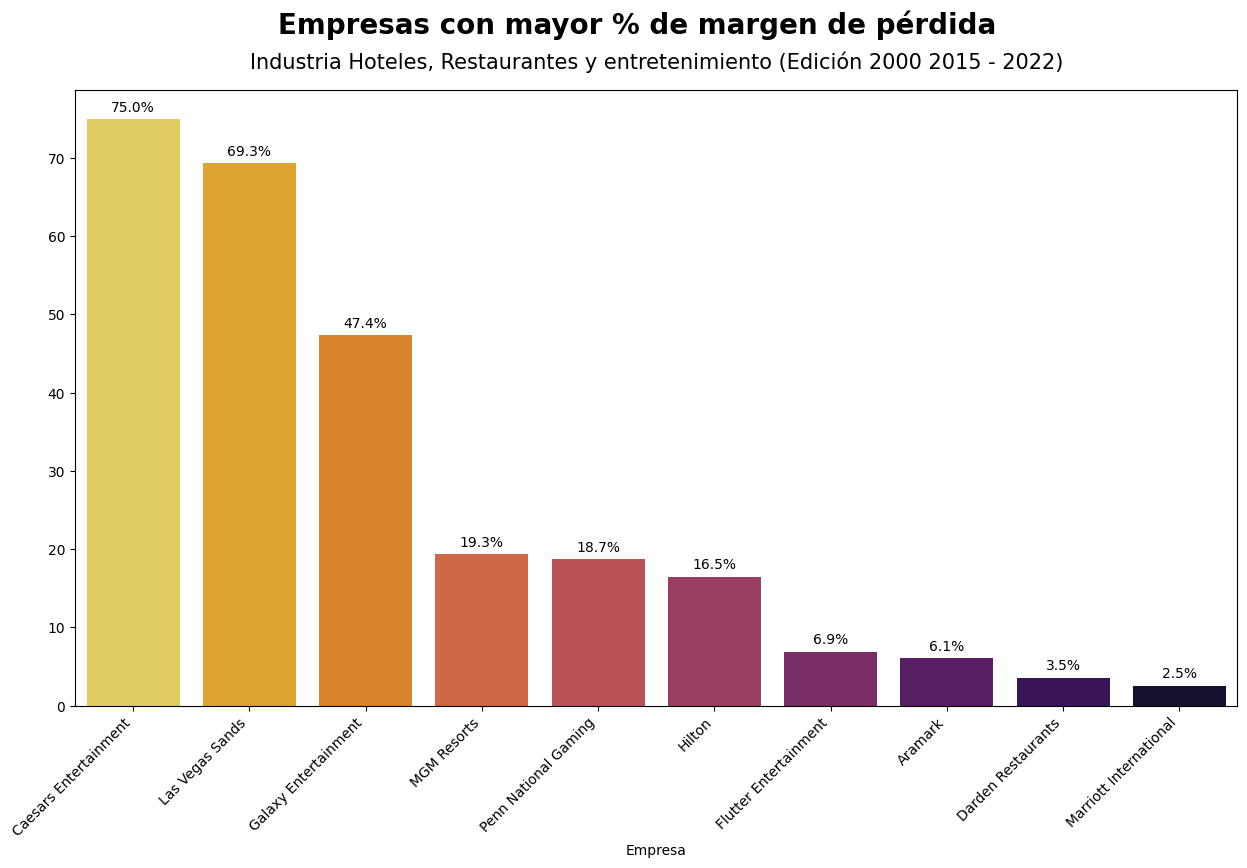

In [230]:
# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=top_10_empresas_perdidas_cb.index, y=top_10_empresas_perdidas_cb.values,
                 palette='inferno_r', saturation=0.75, width=0.8, order=top_10_empresas_perdidas_cb.sort_values(ascending=False).index)

# Ajustes visuales y etiquetas
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.suptitle('Empresas con mayor % de margen de pérdida', fontsize=20, weight='bold')
plt.title('Industria Hoteles, Restaurantes y entretenimiento (Edición 2000 2015 - 2022)', fontsize=15, pad=15)

# Añadir etiquetas con los valores en cada barra
for p in ax.patches:
    width = p.get_width()
    value = p.get_height()
    x = p.get_x() + width / 2
    y = p.get_y() + value + 1
    ax.annotate(f'{value:.1f}%', (x, y), ha='center')

# Mostrar el gráfico
plt.show()

**4. Considerando a la Industria Petrolera en las Américas, ¿Cuál o cuáles empresas superaron en más del 20% la rentabilidad de sus activos?**



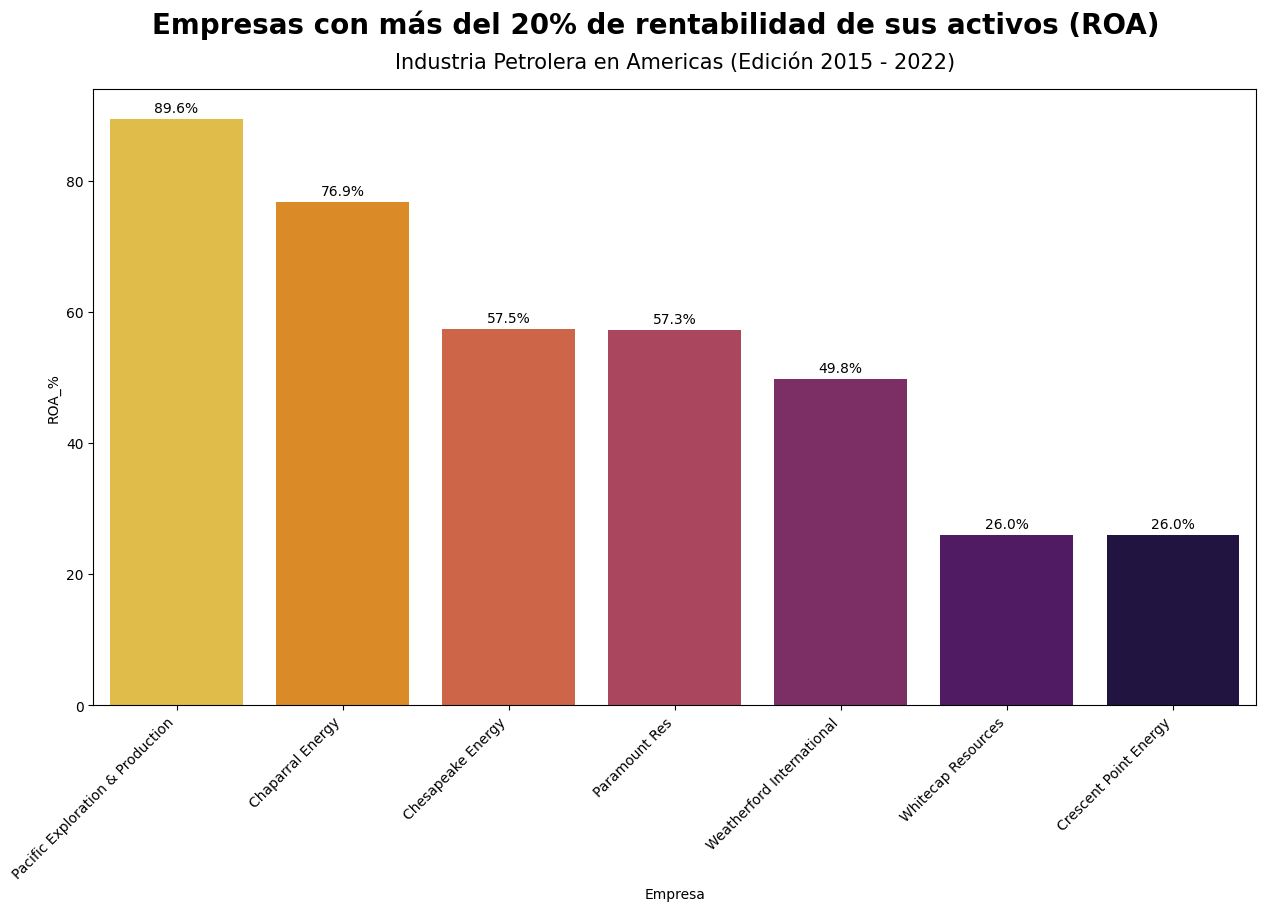

In [231]:
# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=top_oil_cb['Empresa'], y=top_oil_cb['ROA_%'],
                 palette='inferno_r', saturation=0.75, width=0.8)

# Ajustes visuales y etiquetas
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.suptitle('Empresas con más del 20% de rentabilidad de sus activos (ROA)', fontsize=20, weight='bold')
plt.title('Industria Petrolera en Americas (Edición 2015 - 2022)', fontsize=15, pad=15)

# Añadir etiquetas con los valores en cada barra
for p in ax.patches:
    width = p.get_width()
    value = p.get_height()
    x = p.get_x() + width / 2
    y = p.get_y() + value + 1
    ax.annotate(f'{value:.1f}%', (x, y), ha='center')

# Mostrar el gráfico
plt.show()

**5. ¿Cuáles fueron las empresas europeas con el mayor porcentaje de rentabilidad por industria?**



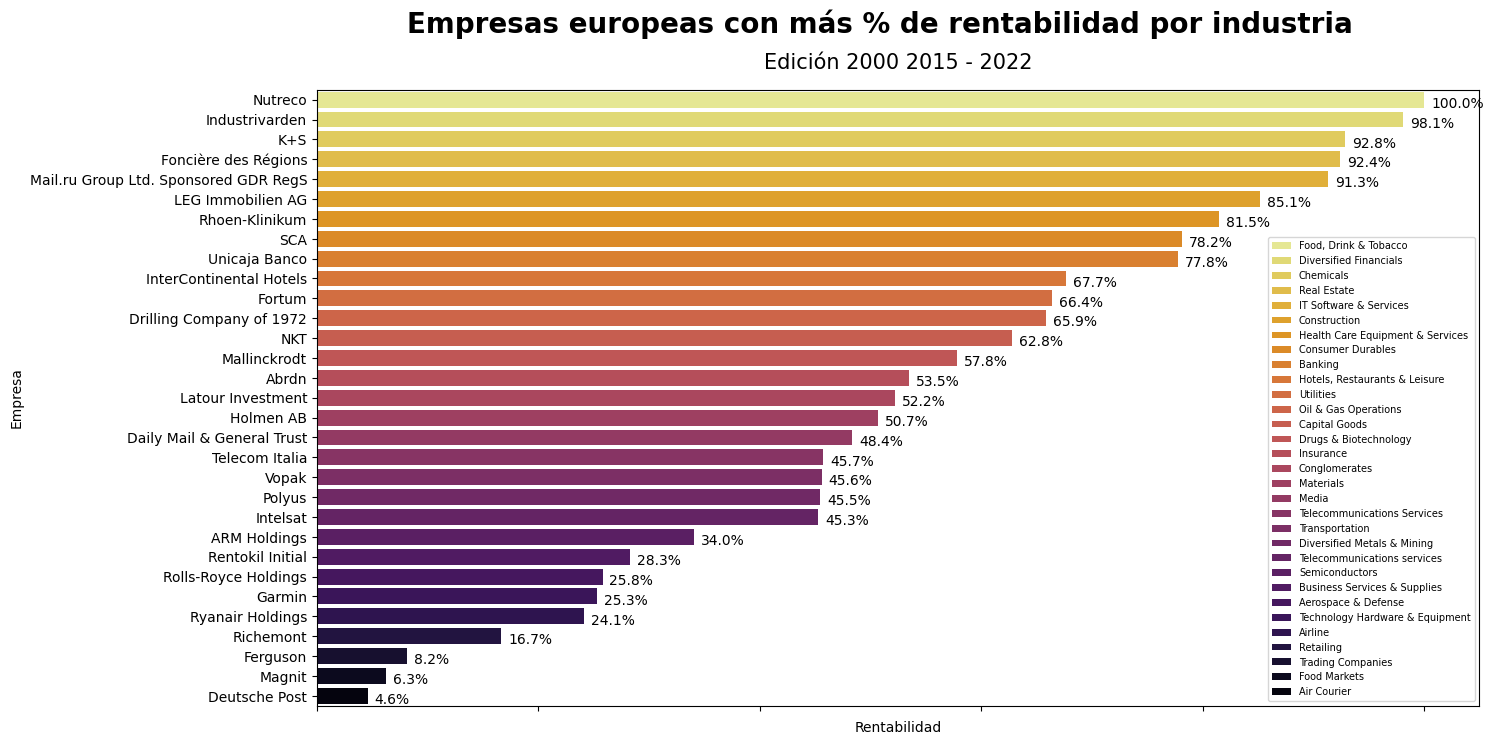

In [232]:
# Filtrar las empresas europeas con margen de rentabilidad menor a 1
top_europe = data_total[(data_total['Continente'] == 'Europe') & (data_total['Margen de Rentabilidad'] < 1)]

# Obtener el índice de las empresas con el mayor margen de rentabilidad en cada industria
mayor_rentabilidad = top_europe.groupby('Industria')['Margen de Rentabilidad'].idxmax()

# Seleccionar las columnas relevantes para mostrar los resultados
empresas_rentabilidad = top_europe.loc[mayor_rentabilidad, ['Industria', 'Continente', 'Empresa', 'Margen de Rentabilidad']]
empresas_rentabilidad['%_rentabilidad'] = (empresas_rentabilidad['Margen de Rentabilidad'] * 100)

# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(15, 8))
data_sorted = empresas_rentabilidad.sort_values('%_rentabilidad', ascending=False)
ax = sns.barplot(data=data_sorted, x='%_rentabilidad', y='Empresa', hue='Industria', dodge=False, palette='inferno_r')
ax.set_xticklabels([])

# Añadir títulos y etiquetas
plt.suptitle('Empresas europeas con más % de rentabilidad por industria', fontsize=20, weight='bold')
plt.title('Edición 2000 2015 - 2022', fontsize=15, pad=15)
plt.xlabel('Rentabilidad')
plt.ylabel('Empresa')

# Ajustar el tamaño de la leyenda
plt.legend(fontsize=7, loc='lower right')

# Añadir etiquetas de valores en las barras
for p in ax.patches:
    width = p.get_width()
    value = p.get_width()
    x = p.get_x() + width
    y = p.get_y() + p.get_height()
    ax.annotate(f'{value:.1f}%', (x, y), xytext=(5, 0), textcoords='offset points')

# Mostrar el gráfico
plt.show()

**6. ¿Cuáles fueron las 10 empresas norteamericanas con mayores pérdidas registradas por industria a nivel global?**



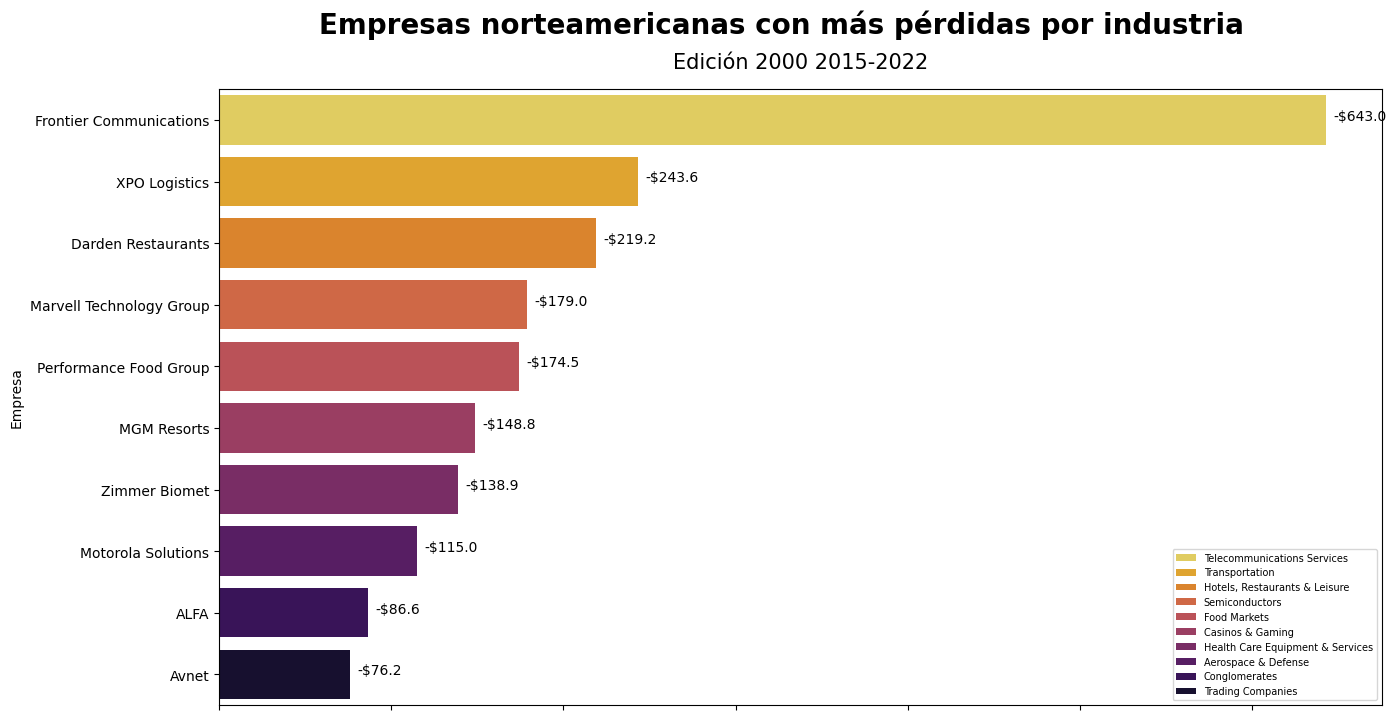

In [233]:
# Filtrar las empresas de América del Norte con pérdidas
data_america = data_forbes_total[(data_forbes_total['Continente'] == 'North America') & (data_forbes_total['Ganancias'] < 0)]

# Obtener el índice de las empresas con las mayores pérdidas en cada industria
mayor_perdida = data_america.groupby('Industria')['Ganancias'].idxmax()

# Seleccionar las columnas relevantes para mostrar los resultados y ordenar por pérdidas
empresas_perdida = data_america.loc[mayor_perdida, ['Industria', 'Empresa', 'Ganancias']].sort_values('Ganancias').head(10)
empresas_perdida['Ganancias_abs'] = empresas_perdida['Ganancias'].abs()

# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=empresas_perdida, x='Ganancias_abs', y='Empresa', hue='Industria', dodge=False, palette='inferno_r')
ax.set_xticklabels([])

# Añadir títulos y etiquetas
plt.suptitle('Empresas norteamericanas con más pérdidas por industria', fontsize=20, weight='bold')
plt.title('Edición 2000 2015-2022', fontsize=15, pad=15)
plt.xlabel('')
plt.ylabel('Empresa')

# Ajustar el tamaño de la leyenda
plt.legend(fontsize=7, loc='lower right')

# Añadir etiquetas de valores en las barras
for p in ax.patches:
    width = p.get_width()
    value = p.get_width()
    x = p.get_x() + width
    y = p.get_y() + p.get_height() / 2
    ax.annotate(f'-${value:.1f}', (x, y), xytext=(5, 0), textcoords='offset points')

# Mostrar el gráfico
plt.show()


**7. ¿Cuál fue la distribución de Ingresos y Activos con respecto a las ganancias de los bancos cuyos activos no superan los 15000 millones de dólares?**



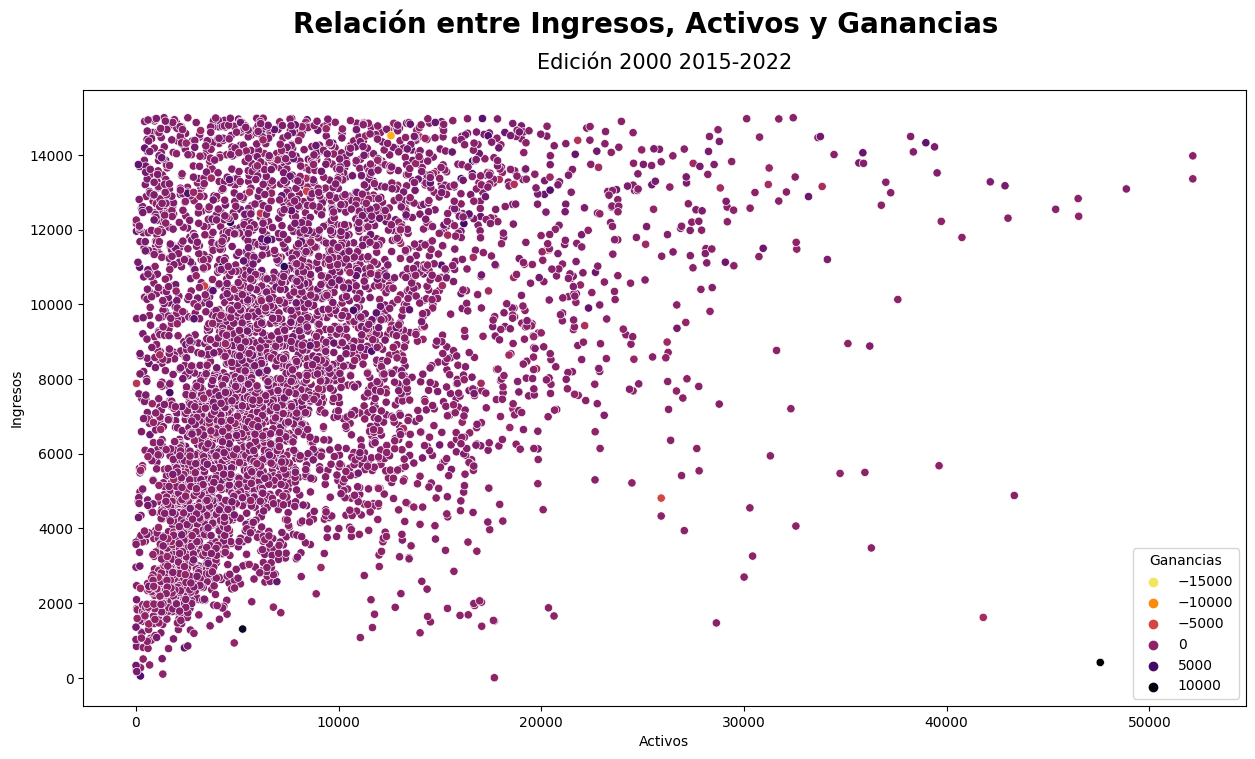

In [234]:
# Crear una figura de tamaño personalizado
plt.figure(figsize=(15, 8))

# Filtrar los datos para empresas con activos menores o iguales a 15000
data_filtrada = data_total[data_total['Activos'] <= 15000]

# Calcular estadísticas descriptivas de los ingresos y activos filtrados
distribucion_ingreso = data_filtrada['Ingresos'].describe()
distribucion_activo = data_filtrada['Activos'].describe()

# Crear un gráfico de dispersión utilizando Seaborn
sns.scatterplot(data=data_filtrada, x='Ingresos', y='Activos', hue='Ganancias', palette='inferno_r')

# Añadir títulos y etiquetas
plt.suptitle('Relación entre Ingresos, Activos y Ganancias', fontsize=20, weight='bold')
plt.title('Edición 2000 2015-2022', fontsize=15, pad=15)
plt.xlabel('Activos')
plt.ylabel('Ingresos')

# Mostrar el gráfico
plt.show()


**8. ¿Cuáles fueron las ganancias anuales de las principales empresas en la Industria automotriz?**

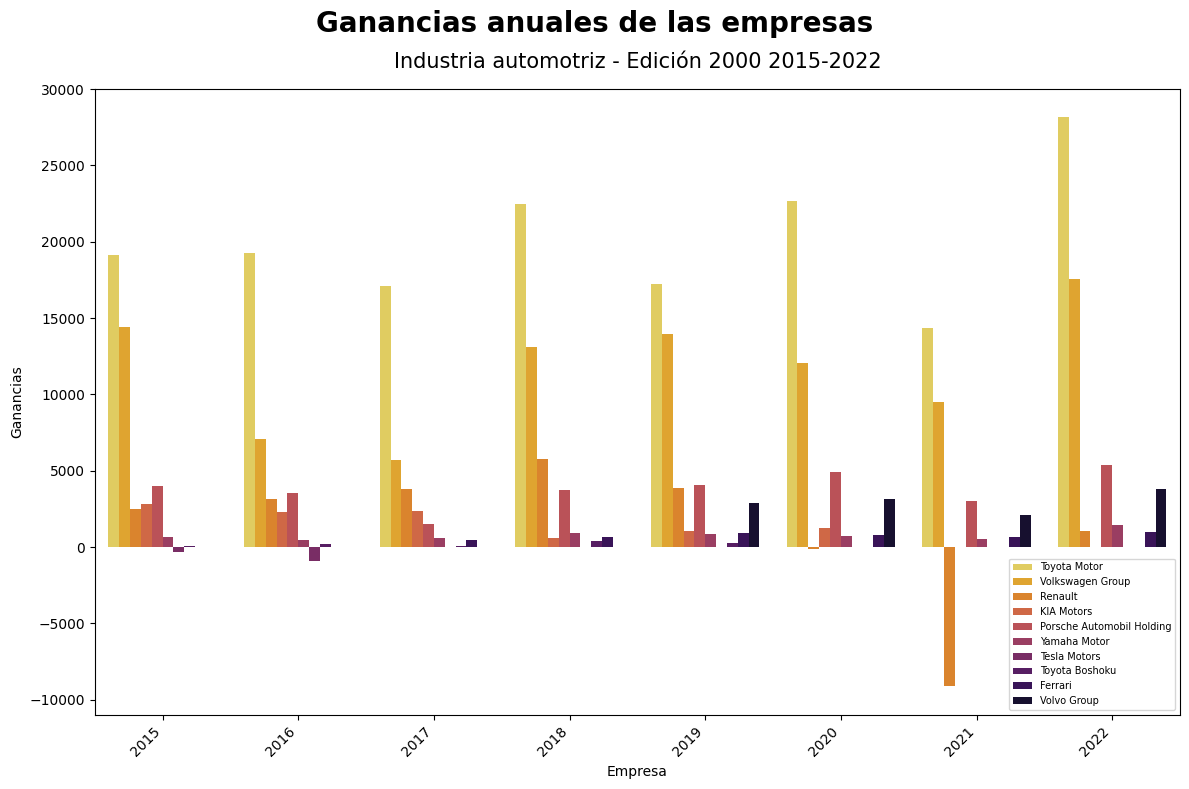

In [235]:
# Empresas seleccionadas
empresas = ['Toyota Motor', 'Volkswagen Group', 'Toyota Boshoku', 'Tesla Motors', 'Yamaha Motor', 'Volvo Group',
            'Ferrari', 'Renault', 'Porsche Automobil Holding', 'KIA Motors']

# Filtrar los datos para la industria de bienes duraderos de consumo y las empresas seleccionadas
data_ganancias = data_total[(data_total['Industria'] == 'Consumer Durables') & (data_total['Empresa'].isin(empresas))]

# Crear una figura de tamaño personalizado
plt.figure(figsize=(12, 8))

# Crear un gráfico de barras utilizando Seaborn
ax = sns.barplot(data=data_ganancias, x='Año', y='Ganancias', hue='Empresa', palette='inferno_r')

# Ajustar las etiquetas del eje x para mejorar la legibilidad
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Añadir títulos y etiquetas
plt.suptitle('Ganancias anuales de las empresas', fontsize=20, weight='bold')
plt.title('Industria automotriz - Edición 2000 2015-2022', fontsize=15, pad=15)
plt.xlabel('Empresa')
plt.ylabel('Ganancias')

# Añadir leyenda en la esquina inferior derecha con tamaño personalizado
plt.legend(loc='lower right', fontsize=7)

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()